In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime as dt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.deterministic import DeterministicProcess
import pmdarima as pm

from tensorflow import keras
from keras import metrics, initializers
from tensorflow.keras.layers import Dropout,LSTM, GRU, BatchNormalization, Dense, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.image as mpimg
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasRegressor

from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

from matplotlib import style
style.use('tableau-colorblind10')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import scipy as sp
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

In [3]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [4]:
df = pd.read_csv('Data/bitcoin without lag.csv', parse_dates=['datetime'], index_col=['datetime'])
#df = pd.read_csv('Data/Bitcoin preprocessed.csv', index_col=['datetime'])
df.head()

high       low      open  volumefrom      volumeto  \
datetime                                                                      
2022-07-01 00:00:00  20817.65  19647.29  19908.49     6823.65  1.381081e+08   
2022-07-01 01:00:00  20444.21  20231.53  20262.66     3183.32  6.471331e+07   
2022-07-01 02:00:00  20504.52  20238.04  20380.14     2262.26  4.603065e+07   
2022-07-01 03:00:00  20276.63  19668.22  20266.86     3603.45  7.212081e+07   
2022-07-01 04:00:00  19713.40  19352.87  19703.32     3932.58  7.685356e+07   

                        close  hourly_volume  top_tier_volume_quote  \
datetime                                                              
2022-07-01 00:00:00  20262.66      143641.30           1.413396e+08   
2022-07-01 01:00:00  20380.14       64012.17           6.423249e+07   
2022-07-01 02:00:00  20266.86       48773.36           4.844529e+07   
2022-07-01 03:00:00  19703.32       65925.93           5.869008e+07   
2022-07-01 04:00:00  19376.97       84503.60           7.795704e+07   

                     top_tier_volume_base  top_tier_volume_total  \
datetime                                                           
2022-07-01 00:00:00          1.734342e+09           1.875681e+09   
2022-07-01 01:00:00          8.010797e+08           8.653122e+08   
2022-07-01 02:00:00          5.490071e+08           5.974524e+08   
2022-07-01 03:00:00          8.222572e+08           8.809473e+08   
2022-07-01 04:00:00          2.074082e+09           2.152039e+09   

                     cccagg_volume_quote  cccagg_volume_base  \
datetime                                                       
2022-07-01 00:00:00         1.023345e+08        1.014878e+09   
2022-07-01 01:00:00         4.611965e+07        4.423495e+08   
2022-07-01 02:00:00         3.446238e+07        3.276693e+08   
2022-07-01 03:00:00         4.438665e+07        4.956181e+08   
2022-07-01 04:00:00         5.267009e+07        6.085733e+08   

                     cccagg_volume_total  total_volume_quote  \
datetime                                                       
2022-07-01 00:00:00         1.117212e+09        1.706061e+08   
2022-07-01 01:00:00         4.884692e+08        8.518715e+07   
2022-07-01 02:00:00         3.621317e+08        7.538542e+07   
2022-07-01 03:00:00         5.400048e+08        7.742932e+07   
2022-07-01 04:00:00         6.612434e+08        1.007285e+08   

                     total_volume_base  total_volume_total  eth_open  \
datetime                                                               
2022-07-01 00:00:00       1.915078e+09        2.085684e+09   1069.53   
2022-07-01 01:00:00       8.941570e+08        9.793442e+08   1093.82   
2022-07-01 02:00:00       6.256688e+08        7.010542e+08   1095.07   
2022-07-01 03:00:00       9.239673e+08        1.001397e+09   1091.22   
2022-07-01 04:00:00       2.285414e+09        2.386143e+09   1053.55   

                     eth_close  bnb_open  bnb_close  usdt_open  usdt_close  \
datetime                                                                     
2022-07-01 00:00:00    1093.82    219.48     222.58     0.9992      0.9987   
2022-07-01 01:00:00    1095.07    222.58     225.22     0.9987      0.9985   
2022-07-01 02:00:00    1091.22    225.22     225.60     0.9985      0.9982   
2022-07-01 03:00:00    1053.55    225.60     220.97     0.9982      0.9980   
2022-07-01 04:00:00    1048.59    220.97     219.20     0.9980      0.9981   

                     sol_open  sol_close  hourly_return  3_hourly_return  \
datetime                                                                   
2022-07-01 00:00:00     33.74      34.44         354.17          1464.85   
2022-07-01 01:00:00     34.44      34.87         117.48          1506.73   
2022-07-01 02:00:00     34.87      34.77        -113.28           358.37   
2022-07-01 03:00:00     34.77      33.61        -563.54          -559.34   
2022-07-01 04:00:00     33.61      32.55        -326.35         -1003.17   

             

In [5]:
df = df.drop(['Pos_score', 'Neg_score'], axis = 1)

### Feature Engineering

In [6]:
df['day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [7]:
df['day_of_week'] = 1
for i in range(len(df.index)):
    if df['day'][i] == 'Sunday':
        df['day_of_week'][i] = 1
    elif df['day'][i] == 'Monday':
        df['day_of_week'][i] = 2
    elif df['day'][i] == 'Tuesday':
        df['day_of_week'][i] = 3
    elif df['day'][i] == 'Wednesday':
        df['day_of_week'][i] = 4
    elif df['day'][i] == 'Thursday':
        df['day_of_week'][i] = 5
    elif df['day'][i] == 'Friday':
        df['day_of_week'][i] = 6
    elif df['day'][i] == 'Saturday':
        df['day_of_week'][i] = 7

In [8]:
#df.drop('day', axis = 1, inplace = True)
df['hourly_return'] = 0
for i in range(1, len(df.index)):
    df['hourly_return'][i] = df['close'][i] - df['close'][i-1]

In [9]:
df.head()

high       low      open  volumefrom      volumeto  \
datetime                                                                      
2022-07-01 00:00:00  20817.65  19647.29  19908.49     6823.65  1.381081e+08   
2022-07-01 01:00:00  20444.21  20231.53  20262.66     3183.32  6.471331e+07   
2022-07-01 02:00:00  20504.52  20238.04  20380.14     2262.26  4.603065e+07   
2022-07-01 03:00:00  20276.63  19668.22  20266.86     3603.45  7.212081e+07   
2022-07-01 04:00:00  19713.40  19352.87  19703.32     3932.58  7.685356e+07   

                        close  hourly_volume  top_tier_volume_quote  \
datetime                                                              
2022-07-01 00:00:00  20262.66      143641.30           1.413396e+08   
2022-07-01 01:00:00  20380.14       64012.17           6.423249e+07   
2022-07-01 02:00:00  20266.86       48773.36           4.844529e+07   
2022-07-01 03:00:00  19703.32       65925.93           5.869008e+07   
2022-07-01 04:00:00  19376.97       84503.60           7.795704e+07   

                     top_tier_volume_base  top_tier_volume_total  \
datetime                                                           
2022-07-01 00:00:00          1.734342e+09           1.875681e+09   
2022-07-01 01:00:00          8.010797e+08           8.653122e+08   
2022-07-01 02:00:00          5.490071e+08           5.974524e+08   
2022-07-01 03:00:00          8.222572e+08           8.809473e+08   
2022-07-01 04:00:00          2.074082e+09           2.152039e+09   

                     cccagg_volume_quote  cccagg_volume_base  \
datetime                                                       
2022-07-01 00:00:00         1.023345e+08        1.014878e+09   
2022-07-01 01:00:00         4.611965e+07        4.423495e+08   
2022-07-01 02:00:00         3.446238e+07        3.276693e+08   
2022-07-01 03:00:00         4.438665e+07        4.956181e+08   
2022-07-01 04:00:00         5.267009e+07        6.085733e+08   

                     cccagg_volume_total  total_volume_quote  \
datetime                                                       
2022-07-01 00:00:00         1.117212e+09        1.706061e+08   
2022-07-01 01:00:00         4.884692e+08        8.518715e+07   
2022-07-01 02:00:00         3.621317e+08        7.538542e+07   
2022-07-01 03:00:00         5.400048e+08        7.742932e+07   
2022-07-01 04:00:00         6.612434e+08        1.007285e+08   

                     total_volume_base  total_volume_total  eth_open  \
datetime                                                               
2022-07-01 00:00:00       1.915078e+09        2.085684e+09   1069.53   
2022-07-01 01:00:00       8.941570e+08        9.793442e+08   1093.82   
2022-07-01 02:00:00       6.256688e+08        7.010542e+08   1095.07   
2022-07-01 03:00:00       9.239673e+08        1.001397e+09   1091.22   
2022-07-01 04:00:00       2.285414e+09        2.386143e+09   1053.55   

                     eth_close  bnb_open  bnb_close  usdt_open  usdt_close  \
datetime                                                                     
2022-07-01 00:00:00    1093.82    219.48     222.58     0.9992      0.9987   
2022-07-01 01:00:00    1095.07    222.58     225.22     0.9987      0.9985   
2022-07-01 02:00:00    1091.22    225.22     225.60     0.9985      0.9982   
2022-07-01 03:00:00    1053.55    225.60     220.97     0.9982      0.9980   
2022-07-01 04:00:00    1048.59    220.97     219.20     0.9980      0.9981   

                     sol_open  sol_close  hourly_return  3_hourly_return  \
datetime                                                                   
2022-07-01 00:00:00     33.74      34.44           0.00          1464.85   
2022-07-01 01:00:00     34.44      34.87         117.48          1506.73   
2022-07-01 02:00:00     34.87      34.77        -113.28           358.37   
2022-07-01 03:00:00     34.77      33.61        -563.54          -559.34   
2022-07-01 04:00:00     33.61      32.55        -326.35         -1003.17   

             

## Univariate Methods

In [10]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
target = df['close'].copy()
ts_decomposition = seasonal_decompose(x = target, model = 'additive', period = 2, extrapolate_trend = 'freq')
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

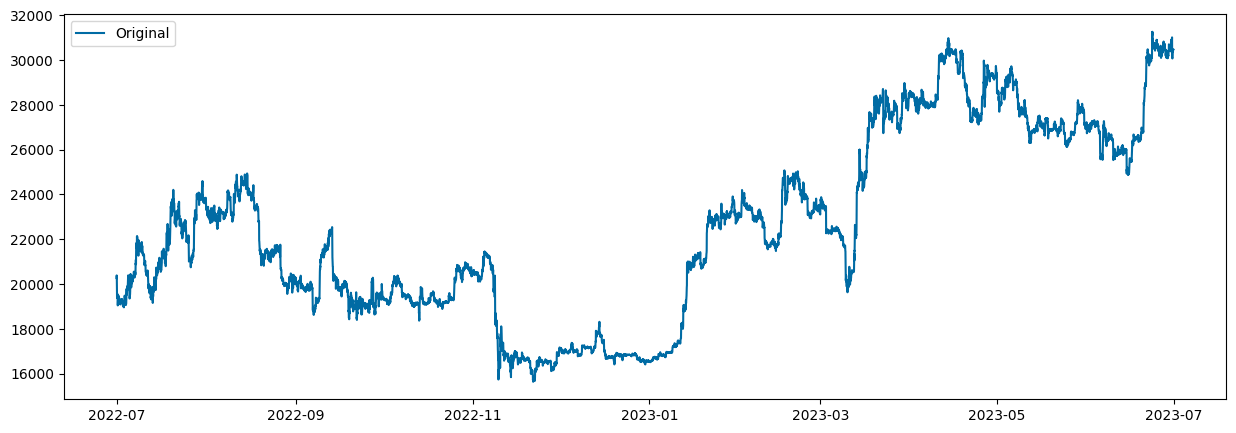

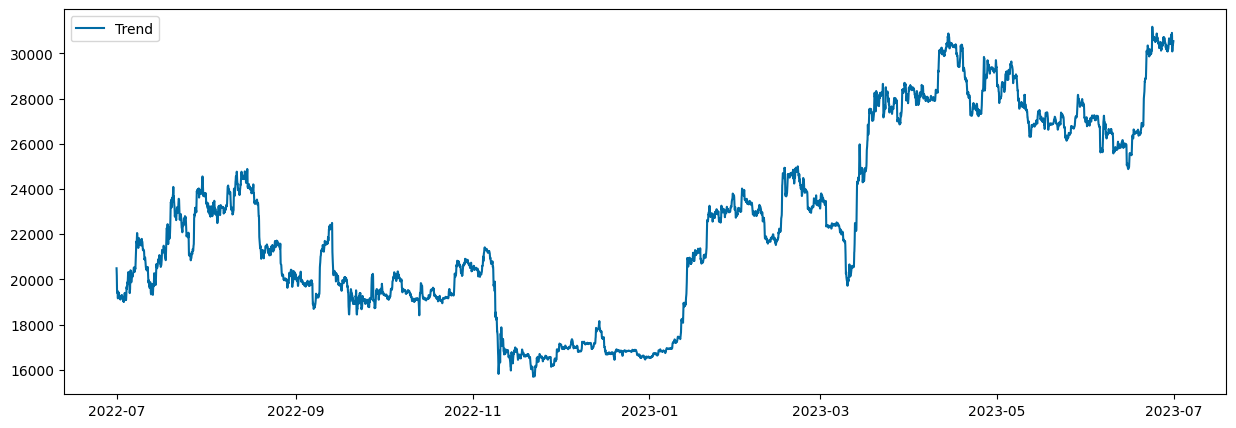

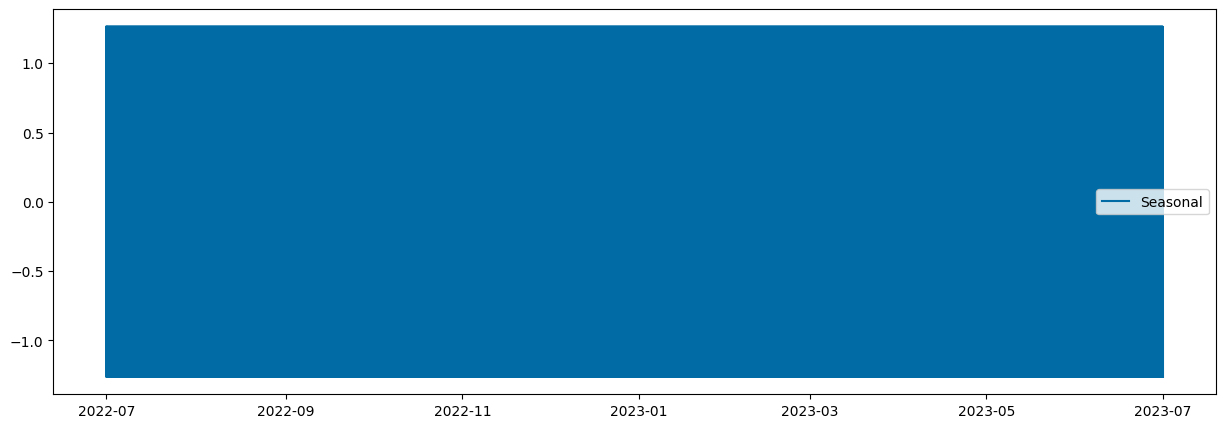

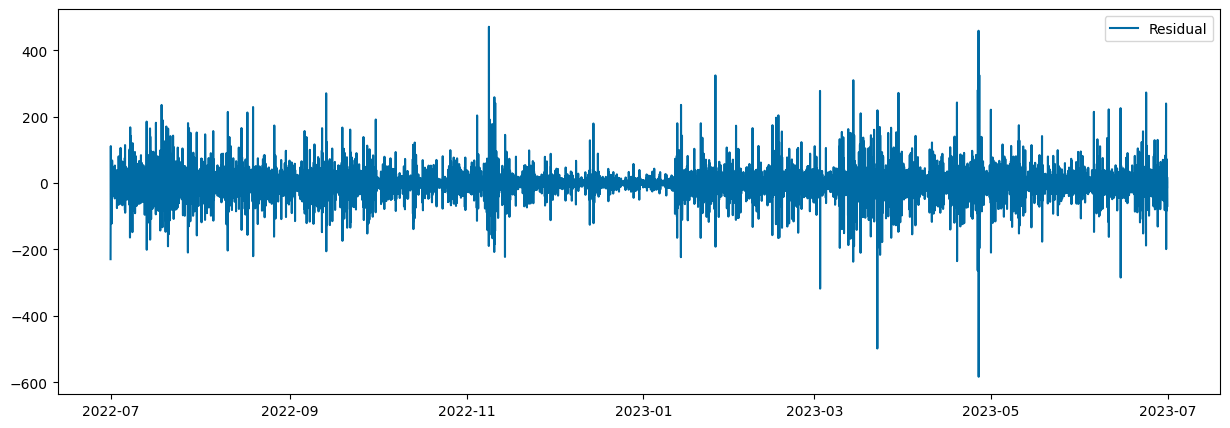

In [11]:
plt.figure(figsize=(15,5))
plt.plot(target, label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

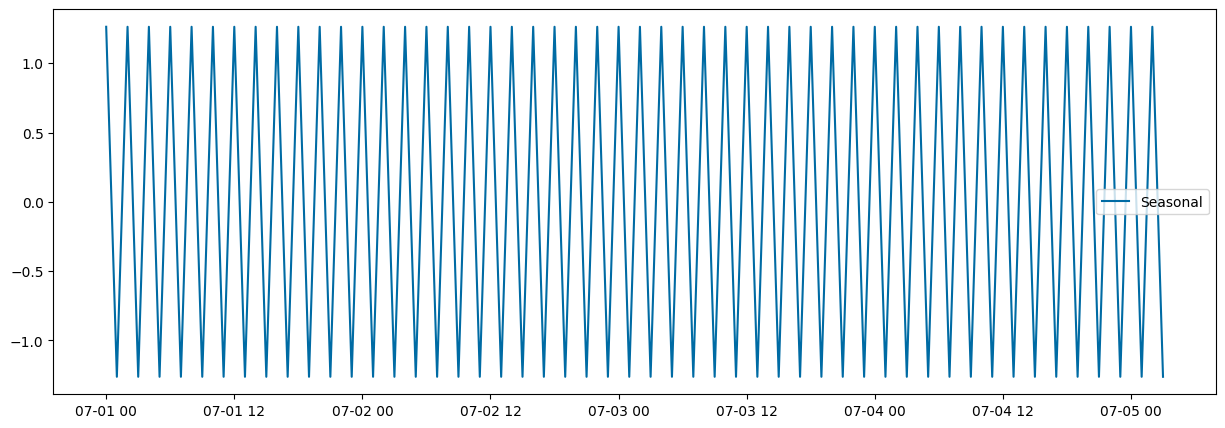

In [12]:
plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate[0:100], label='Seasonal')
plt.legend()

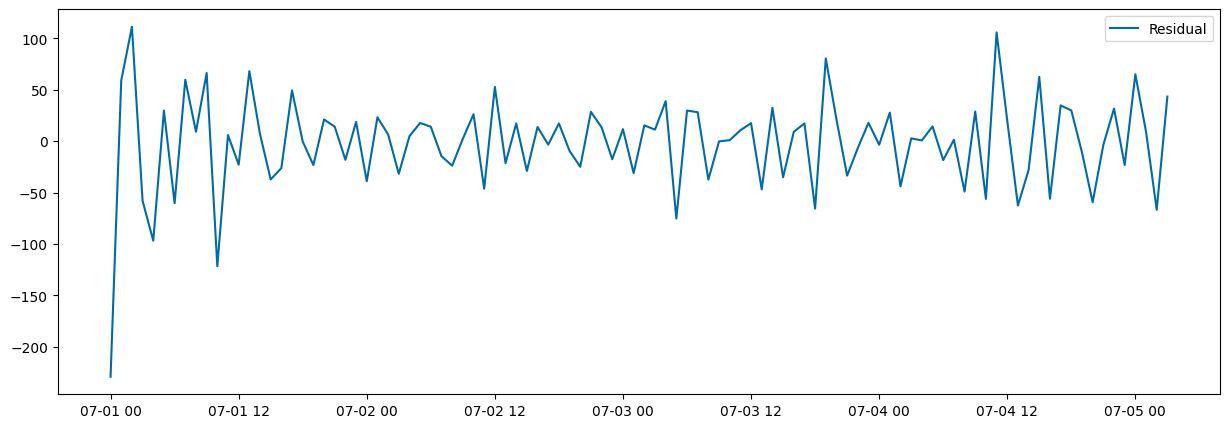

In [15]:
plt.figure(figsize=(15,5))
plt.plot(residual_estimate[0:100], label='Residual')
plt.legend()

In [16]:
new_df = df[['close']]
new_df['trend'] = trend_estimate
new_df['seasonal'] = seasonal_estimate
new_df['resid'] = residual_estimate

In [17]:
new_df

close       trend  seasonal       resid
datetime                                                       
2022-07-01 00:00:00  20262.66  20490.6050  1.263217 -229.208217
2022-07-01 01:00:00  20380.14  20322.4500 -1.263217   58.953217
2022-07-01 02:00:00  20266.86  20154.2950  1.263217  111.301783
2022-07-01 03:00:00  19703.32  19762.6175 -1.263217  -58.034283
2022-07-01 04:00:00  19376.97  19472.5525  1.263217  -96.845717
...                       ...         ...       ...         ...
2023-06-30 19:00:00  30376.79  30374.7975 -1.263217    3.255717
2023-06-30 20:00:00  30394.62  30408.8600  1.263217  -15.503217
2023-06-30 21:00:00  30469.41  30452.8600 -1.263217   17.813217
2023-06-30 22:00:00  30478.00  30474.1175  1.263217    2.619283
2023-06-30 23:00:00  30471.06  30540.8600 -1.263217  -68.536783

[8760 rows x 4 columns]

In [18]:
new_df['close'] = new_df['close'].shift(-1)
new_df = new_df.dropna()

In [19]:
trend = new_df['trend'].values
seasonal = new_df['seasonal'].values
resid = new_df['resid'].values
y = new_df['close'].values

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)
seasonal_X_train, seasonal_X_test = train_test_split(seasonal, test_size = 500, shuffle = False)

trend_X_train = trend_X_train.reshape(-1, 1)
trend_X_test = trend_X_test.reshape(-1, 1)
resid_X_train = resid_X_train.reshape(-1, 1)
resid_X_test = resid_X_test.reshape(-1, 1)
seasonal_X_train = seasonal_X_train.reshape(-1, 1)
seasonal_X_test = seasonal_X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [20]:
# Fit trend model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(trend_X_train, y_train)

LinearRegression(fit_intercept=False)

In [21]:
y_fit = model.predict(trend_X_train)
y_pred = model.predict(trend_X_test)

In [22]:
y_pred.shape

(500, 1)

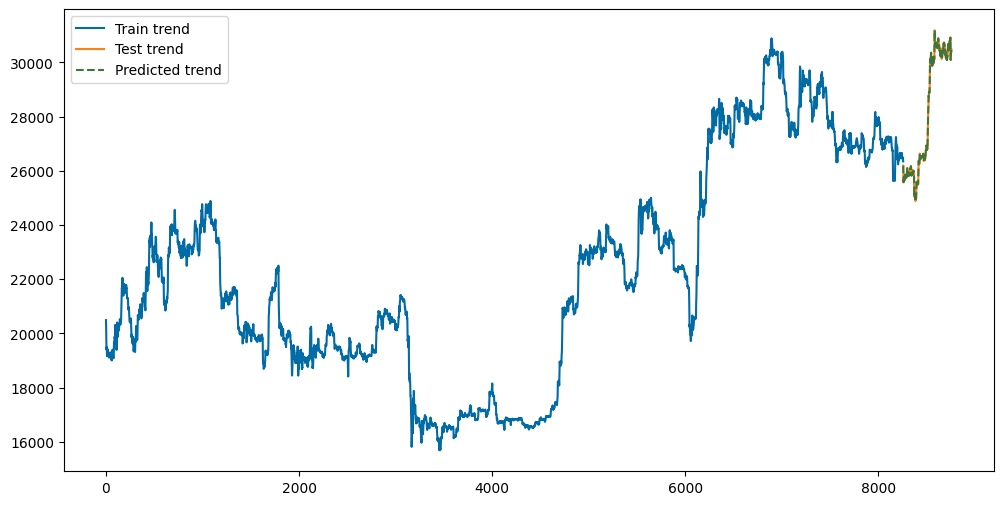

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(0, len(new_df.index) - 500), trend_X_train[:len(new_df.index) - 500], label = 'Train trend');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), trend_X_test, label = 'Test trend');
#ax.plot(np.arange(0, len(df.index) - 500), y_fit, linestyle='--', color='#ff7823');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), y_pred, linestyle='--', color='#3c763d', label = 'Predicted trend'); 
ax.legend();
ax.set_title("");

In [24]:
# MAPE
import statistics
from sklearn.metrics import mean_squared_error

def MAPE(actual, pred):
    assert len(actual) == len(pred), "Input arrays must have the same length."
    error_ = []
    for ii in range(len(actual)):
        absolute_errors = abs((actual[ii] - pred[ii]) / actual[ii])
        error_.append(absolute_errors)
    
    mape = (sum(error_)/len(error_)) * 100.0

    return mape

def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

In [25]:
rmse(trend_X_test, y_pred)

0.8164751524390701

In [26]:
# Create residuals (the collection of detrended series) from the training set
y_resid = y_train - y_fit

In [27]:
# Train XGBoost on the residuals
xgb = LinearRegression()
xgb.fit(resid_X_train, y_resid)

LinearRegression()

In [28]:
# Add the predicted residuals onto the predicted trends
y_pred_boosted = xgb.predict(resid_X_test).reshape(-1, 1) + y_pred + seasonal_X_test

In [29]:
mape_error = MAPE(y_test, y_pred_boosted)
rmse_error = rmse(y_test, y_pred_boosted)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_boosted)

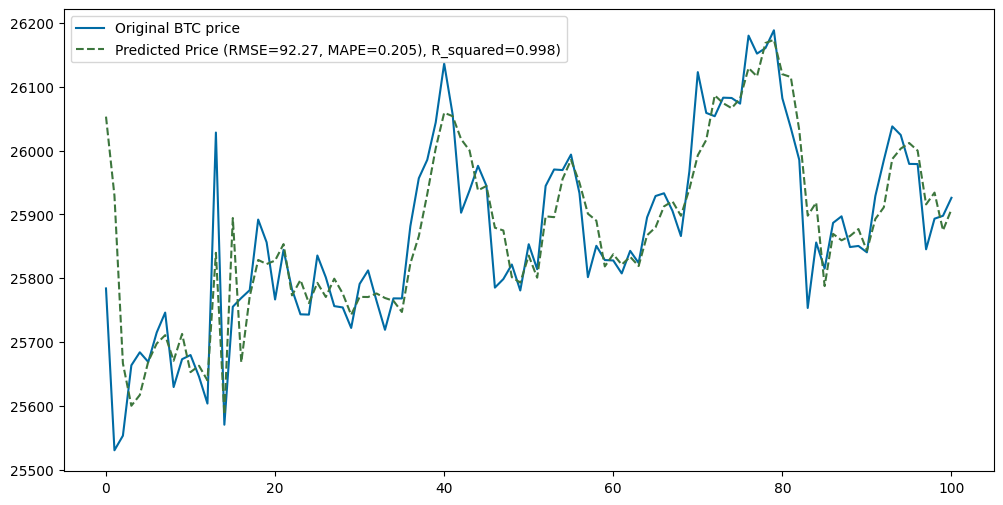

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(y_pred_boosted[0:101], linestyle='--', color='#3c763d',
         label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}), R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

In [31]:
ress = y_test - y_pred_boosted

ress_list = [float(x) for x in ress]

ress_mean = np.mean(ress_list)
ress_std = np.std(ress_list)

ress_standard = [(x - ress_mean)/ress_std for x in ress_list]

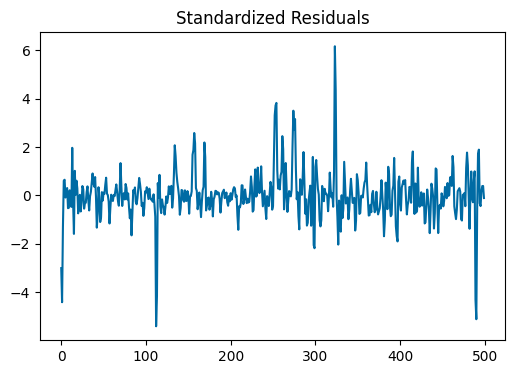

In [32]:
fig, ax = plt.subplots(figsize=(6, 4));
ax.plot(ress_standard);
ax.set_title('Standardized Residuals');

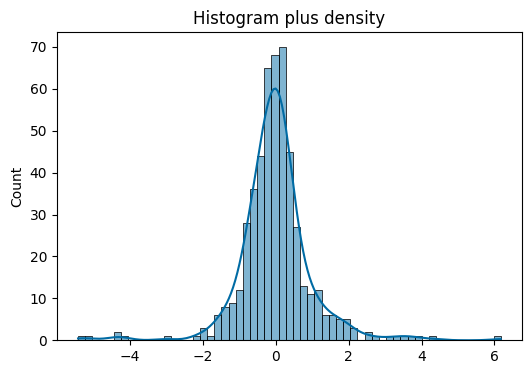

In [33]:
fig, ax = plt.subplots(figsize=(6, 4));
f = sns.histplot(data = ress_standard, kde=True)
ax.set_title("Histogram plus density");

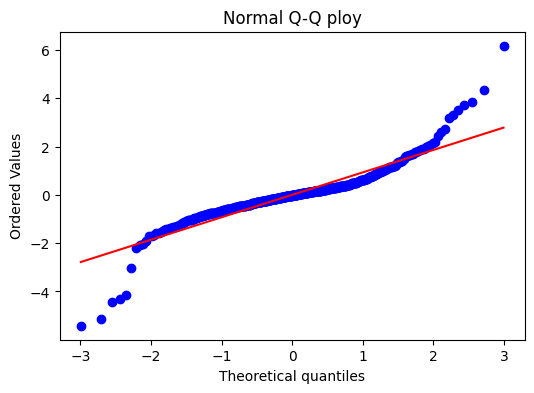

In [34]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(6, 4));
f = stats.probplot(ress_standard, dist="norm", plot=plt)
ax.set_title("Normal Q-Q ploy");

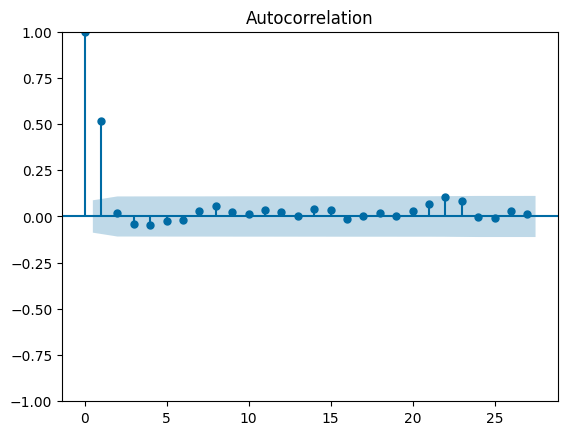

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(np.array(ress))
plt.show()

##### Search for model combination

In [32]:
def hybrid(model1, model2):
    model1.fit(trend_X_train, y_train)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)

    y_resid = y_train - y_fit.reshape(-1, 1)

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted), r2_score(y_test, y_pred_boosted)

In [33]:
# list of all models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [29]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error, r2= hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

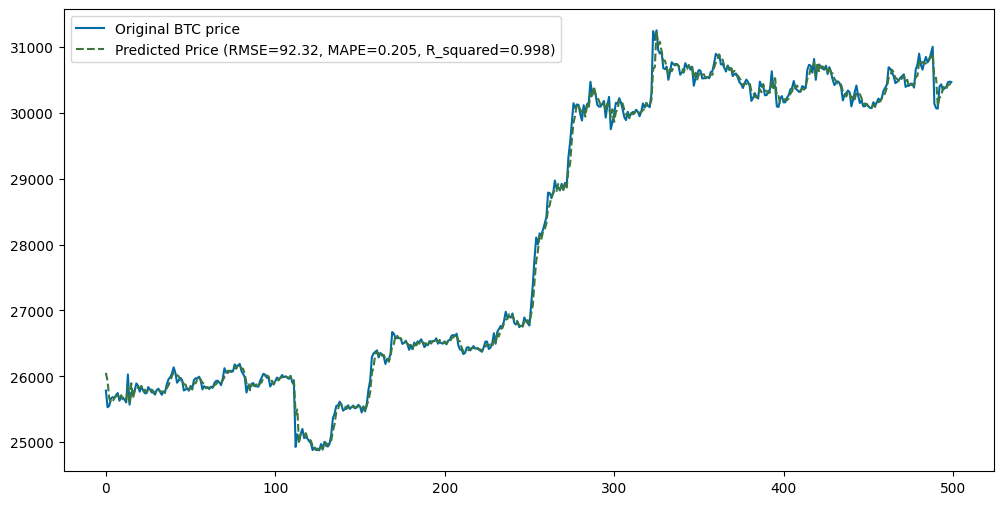

In [30]:
predicted_value, rmse_error, mdape_error, r2 = hybrid(LinearRegression(), LinearRegression())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test, label = 'Original BTC price');
ax.plot(predicted_value, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

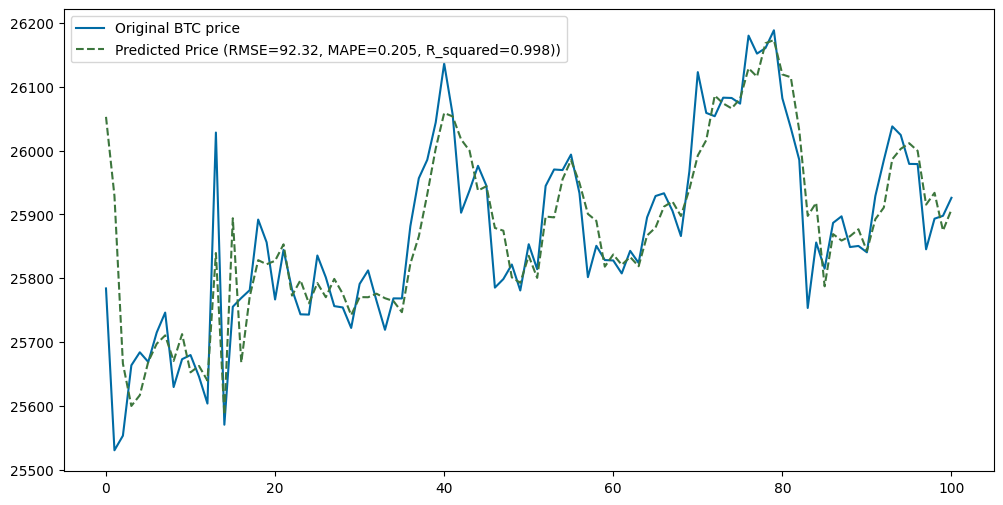

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f}))".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

### Deep learning

##### ANN

In [35]:
with tf.device('/cpu:0'):
    # Create sequential model from tensorflow.keras
    ANN_model1 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    ANN_model1.add(Dense(units = 4, input_dim = 1, activation = 'relu',
                         activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))

    # Add output layer with one 1 ouput neuron as this is regression problem
    ANN_model1.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    ANN_model1.compile(optimizer = Adam(0.0005), loss = 'mse')
    
    # Create sequential model from tensorflow.keras
    ANN_model2 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    ANN_model2.add(Dense(units = 4, input_dim = 1, activation = 'relu',
                         activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))
    
    # Add output layer with one 1 ouput neuron as this is regression problem
    ANN_model2.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    ANN_model2.compile(optimizer = Adam(0.0005), loss = 'mse')

In [36]:
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [37]:
def hybrid_dl(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 1000, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)

    y_resid = y_train - y_fit.reshape(-1, 1)

    history = model2.fit(resid_X_train, y_resid, epochs = 1000, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted), r2_score(y_test, y_pred_boosted)

In [38]:
def hybrid_dl_ml(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)

    y_resid = y_train - y_fit.reshape(-1, 1)

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted), r2_score(y_test, y_pred_boosted)

In [36]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32, callbacks = [callback, REDUCE_LR])

Epoch 1/1000
207/207 [==============================] - 2s 4ms/step - loss: 791516672.0000 - val_loss: 1283345408.0000 - lr: 5.0000e-04
Epoch 2/1000
207/207 [==============================] - 1s 4ms/step - loss: 660596864.0000 - val_loss: 1089605376.0000 - lr: 5.0000e-04
Epoch 3/1000
207/207 [==============================] - 1s 4ms/step - loss: 567752896.0000 - val_loss: 947031808.0000 - lr: 5.0000e-04
Epoch 4/1000
207/207 [==============================] - 1s 3ms/step - loss: 497451456.0000 - val_loss: 834998720.0000 - lr: 5.0000e-04
Epoch 5/1000
207/207 [==============================] - 1s 3ms/step - loss: 446213600.0000 - val_loss: 783525312.0000 - lr: 5.0000e-04
Epoch 6/1000
207/207 [==============================] - 1s 3ms/step - loss: 439324864.0000 - val_loss: 783519936.0000 - lr: 5.0000e-04
Epoch 7/1000
207/207 [==============================] - 1s 4ms/step - loss: 439320800.0000 - val_loss: 783514560.0000 - lr: 5.0000e-04
Epoch 8/1000
207/207 [==============================]

207/207 [==============================] - 1s 4ms/step - loss: 438838048.0000 - val_loss: 782863552.0000 - lr: 5.0000e-04
Epoch 122/1000
207/207 [==============================] - 1s 3ms/step - loss: 438833888.0000 - val_loss: 782857856.0000 - lr: 5.0000e-04
Epoch 123/1000
207/207 [==============================] - 1s 4ms/step - loss: 438829696.0000 - val_loss: 782852096.0000 - lr: 5.0000e-04
Epoch 124/1000
207/207 [==============================] - 1s 3ms/step - loss: 438825536.0000 - val_loss: 782846336.0000 - lr: 5.0000e-04
Epoch 125/1000
207/207 [==============================] - 1s 3ms/step - loss: 438821120.0000 - val_loss: 782840704.0000 - lr: 5.0000e-04
Epoch 126/1000
207/207 [==============================] - 1s 3ms/step - loss: 438816800.0000 - val_loss: 782835008.0000 - lr: 5.0000e-04
Epoch 127/1000
207/207 [==============================] - 1s 4ms/step - loss: 438812704.0000 - val_loss: 782829120.0000 - lr: 5.0000e-04
Epoch 128/1000
207/207 [==============================] 

Epoch 181/1000
207/207 [==============================] - 1s 4ms/step - loss: 438583488.0000 - val_loss: 782520064.0000 - lr: 5.0000e-04
Epoch 182/1000
207/207 [==============================] - 1s 3ms/step - loss: 438579136.0000 - val_loss: 782514432.0000 - lr: 5.0000e-04
Epoch 183/1000
207/207 [==============================] - 1s 3ms/step - loss: 438574976.0000 - val_loss: 782508800.0000 - lr: 5.0000e-04
Epoch 184/1000
207/207 [==============================] - 1s 4ms/step - loss: 438570848.0000 - val_loss: 782502848.0000 - lr: 5.0000e-04
Epoch 185/1000
207/207 [==============================] - 1s 4ms/step - loss: 438566624.0000 - val_loss: 782497280.0000 - lr: 5.0000e-04
Epoch 186/1000
207/207 [==============================] - 1s 3ms/step - loss: 438562240.0000 - val_loss: 782491520.0000 - lr: 5.0000e-04
Epoch 187/1000
207/207 [==============================] - 1s 3ms/step - loss: 438558016.0000 - val_loss: 782485696.0000 - lr: 5.0000e-04
Epoch 188/1000
207/207 [=================

Epoch 241/1000
207/207 [==============================] - 1s 3ms/step - loss: 438328896.0000 - val_loss: 782176768.0000 - lr: 5.0000e-04
Epoch 242/1000
207/207 [==============================] - 1s 4ms/step - loss: 438324576.0000 - val_loss: 782171136.0000 - lr: 5.0000e-04
Epoch 243/1000
207/207 [==============================] - 1s 3ms/step - loss: 438320288.0000 - val_loss: 782165312.0000 - lr: 5.0000e-04
Epoch 244/1000
207/207 [==============================] - 1s 3ms/step - loss: 438316128.0000 - val_loss: 782159616.0000 - lr: 5.0000e-04
Epoch 245/1000
207/207 [==============================] - 1s 4ms/step - loss: 438311936.0000 - val_loss: 782153984.0000 - lr: 5.0000e-04
Epoch 246/1000
207/207 [==============================] - 1s 4ms/step - loss: 438307808.0000 - val_loss: 782148224.0000 - lr: 5.0000e-04
Epoch 247/1000
207/207 [==============================] - 1s 3ms/step - loss: 438303616.0000 - val_loss: 782142592.0000 - lr: 5.0000e-04
Epoch 248/1000
207/207 [=================

Epoch 301/1000
207/207 [==============================] - 1s 3ms/step - loss: 438074432.0000 - val_loss: 781833792.0000 - lr: 5.0000e-04
Epoch 302/1000
207/207 [==============================] - 1s 3ms/step - loss: 438070240.0000 - val_loss: 781827840.0000 - lr: 5.0000e-04
Epoch 303/1000
207/207 [==============================] - 1s 3ms/step - loss: 438065888.0000 - val_loss: 781822080.0000 - lr: 5.0000e-04
Epoch 304/1000
207/207 [==============================] - 1s 3ms/step - loss: 438061920.0000 - val_loss: 781816448.0000 - lr: 5.0000e-04
Epoch 305/1000
207/207 [==============================] - 1s 4ms/step - loss: 438057376.0000 - val_loss: 781810688.0000 - lr: 5.0000e-04
Epoch 306/1000
207/207 [==============================] - 1s 3ms/step - loss: 438053024.0000 - val_loss: 781804992.0000 - lr: 5.0000e-04
Epoch 307/1000
207/207 [==============================] - 1s 3ms/step - loss: 438049024.0000 - val_loss: 781799424.0000 - lr: 5.0000e-04
Epoch 308/1000
207/207 [=================

Epoch 361/1000
207/207 [==============================] - 1s 4ms/step - loss: 437820192.0000 - val_loss: 781490368.0000 - lr: 5.0000e-04
Epoch 362/1000
207/207 [==============================] - 1s 3ms/step - loss: 437815808.0000 - val_loss: 781484672.0000 - lr: 5.0000e-04
Epoch 363/1000
207/207 [==============================] - 1s 4ms/step - loss: 437811712.0000 - val_loss: 781478976.0000 - lr: 5.0000e-04
Epoch 364/1000
207/207 [==============================] - 1s 3ms/step - loss: 437807328.0000 - val_loss: 781473216.0000 - lr: 5.0000e-04
Epoch 365/1000
207/207 [==============================] - 1s 4ms/step - loss: 437803072.0000 - val_loss: 781467392.0000 - lr: 5.0000e-04
Epoch 366/1000
207/207 [==============================] - 1s 4ms/step - loss: 437798816.0000 - val_loss: 781461824.0000 - lr: 5.0000e-04
Epoch 367/1000
207/207 [==============================] - 1s 3ms/step - loss: 437794528.0000 - val_loss: 781456000.0000 - lr: 5.0000e-04
Epoch 368/1000
207/207 [=================

Epoch 421/1000
207/207 [==============================] - 1s 3ms/step - loss: 437565696.0000 - val_loss: 781147200.0000 - lr: 5.0000e-04
Epoch 422/1000
207/207 [==============================] - 1s 4ms/step - loss: 437561376.0000 - val_loss: 781141376.0000 - lr: 5.0000e-04
Epoch 423/1000
207/207 [==============================] - 1s 3ms/step - loss: 437557184.0000 - val_loss: 781135936.0000 - lr: 5.0000e-04
Epoch 424/1000
207/207 [==============================] - 1s 3ms/step - loss: 437552864.0000 - val_loss: 781130112.0000 - lr: 5.0000e-04
Epoch 425/1000
207/207 [==============================] - 1s 3ms/step - loss: 437548704.0000 - val_loss: 781124224.0000 - lr: 5.0000e-04
Epoch 426/1000
207/207 [==============================] - 1s 3ms/step - loss: 437544480.0000 - val_loss: 781118656.0000 - lr: 5.0000e-04
Epoch 427/1000
207/207 [==============================] - 1s 3ms/step - loss: 437540224.0000 - val_loss: 781112960.0000 - lr: 5.0000e-04
Epoch 428/1000
207/207 [=================

Epoch 481/1000
207/207 [==============================] - 1s 3ms/step - loss: 437311232.0000 - val_loss: 780804096.0000 - lr: 5.0000e-04
Epoch 482/1000
207/207 [==============================] - 1s 3ms/step - loss: 437306944.0000 - val_loss: 780798336.0000 - lr: 5.0000e-04
Epoch 483/1000
207/207 [==============================] - 1s 3ms/step - loss: 437302816.0000 - val_loss: 780792832.0000 - lr: 5.0000e-04
Epoch 484/1000
207/207 [==============================] - 1s 3ms/step - loss: 437298592.0000 - val_loss: 780786944.0000 - lr: 5.0000e-04
Epoch 485/1000
207/207 [==============================] - 1s 3ms/step - loss: 437294272.0000 - val_loss: 780781312.0000 - lr: 5.0000e-04
Epoch 486/1000
207/207 [==============================] - 1s 3ms/step - loss: 437290144.0000 - val_loss: 780775808.0000 - lr: 5.0000e-04
Epoch 487/1000
207/207 [==============================] - 1s 4ms/step - loss: 437285856.0000 - val_loss: 780769792.0000 - lr: 5.0000e-04
Epoch 488/1000
207/207 [=================

Epoch 541/1000
207/207 [==============================] - 1s 3ms/step - loss: 437057056.0000 - val_loss: 780460992.0000 - lr: 5.0000e-04
Epoch 542/1000
207/207 [==============================] - 1s 3ms/step - loss: 437052864.0000 - val_loss: 780455424.0000 - lr: 5.0000e-04
Epoch 543/1000
207/207 [==============================] - 1s 3ms/step - loss: 437048576.0000 - val_loss: 780449664.0000 - lr: 5.0000e-04
Epoch 544/1000
207/207 [==============================] - 1s 3ms/step - loss: 437044448.0000 - val_loss: 780443840.0000 - lr: 5.0000e-04
Epoch 545/1000
207/207 [==============================] - 1s 4ms/step - loss: 437040160.0000 - val_loss: 780438400.0000 - lr: 5.0000e-04
Epoch 546/1000
207/207 [==============================] - 1s 4ms/step - loss: 437035744.0000 - val_loss: 780432384.0000 - lr: 5.0000e-04
Epoch 547/1000
207/207 [==============================] - 1s 3ms/step - loss: 437031648.0000 - val_loss: 780426752.0000 - lr: 5.0000e-04
Epoch 548/1000
207/207 [=================

Epoch 601/1000
207/207 [==============================] - 1s 3ms/step - loss: 436802912.0000 - val_loss: 780118272.0000 - lr: 5.0000e-04
Epoch 602/1000
207/207 [==============================] - 1s 3ms/step - loss: 436798560.0000 - val_loss: 780112640.0000 - lr: 5.0000e-04
Epoch 603/1000
207/207 [==============================] - 1s 4ms/step - loss: 436794304.0000 - val_loss: 780106560.0000 - lr: 5.0000e-04
Epoch 604/1000
207/207 [==============================] - 1s 3ms/step - loss: 436790144.0000 - val_loss: 780101056.0000 - lr: 5.0000e-04
Epoch 605/1000
207/207 [==============================] - 1s 3ms/step - loss: 436785952.0000 - val_loss: 780095296.0000 - lr: 5.0000e-04
Epoch 606/1000
207/207 [==============================] - 1s 3ms/step - loss: 436781696.0000 - val_loss: 780089344.0000 - lr: 5.0000e-04
Epoch 607/1000
207/207 [==============================] - 1s 3ms/step - loss: 436777600.0000 - val_loss: 780083968.0000 - lr: 5.0000e-04
Epoch 608/1000
207/207 [=================

Epoch 661/1000
207/207 [==============================] - 1s 4ms/step - loss: 436548704.0000 - val_loss: 779775104.0000 - lr: 5.0000e-04
Epoch 662/1000
207/207 [==============================] - 1s 3ms/step - loss: 436544416.0000 - val_loss: 779769728.0000 - lr: 5.0000e-04
Epoch 663/1000
207/207 [==============================] - 1s 3ms/step - loss: 436540160.0000 - val_loss: 779763840.0000 - lr: 5.0000e-04
Epoch 664/1000
207/207 [==============================] - 1s 3ms/step - loss: 436536032.0000 - val_loss: 779758016.0000 - lr: 5.0000e-04
Epoch 665/1000
207/207 [==============================] - 1s 3ms/step - loss: 436531776.0000 - val_loss: 779752320.0000 - lr: 5.0000e-04
Epoch 666/1000
207/207 [==============================] - 1s 3ms/step - loss: 436527520.0000 - val_loss: 779746624.0000 - lr: 5.0000e-04
Epoch 667/1000
207/207 [==============================] - 1s 3ms/step - loss: 436523360.0000 - val_loss: 779741056.0000 - lr: 5.0000e-04
Epoch 668/1000
207/207 [=================

Epoch 721/1000
207/207 [==============================] - 1s 3ms/step - loss: 436294720.0000 - val_loss: 779432256.0000 - lr: 5.0000e-04
Epoch 722/1000
207/207 [==============================] - 1s 3ms/step - loss: 436290368.0000 - val_loss: 779426624.0000 - lr: 5.0000e-04
Epoch 723/1000
207/207 [==============================] - 1s 3ms/step - loss: 436286176.0000 - val_loss: 779420928.0000 - lr: 5.0000e-04
Epoch 724/1000
207/207 [==============================] - 1s 3ms/step - loss: 436282048.0000 - val_loss: 779415104.0000 - lr: 5.0000e-04
Epoch 725/1000
207/207 [==============================] - 1s 3ms/step - loss: 436277696.0000 - val_loss: 779409472.0000 - lr: 5.0000e-04
Epoch 726/1000
207/207 [==============================] - 1s 3ms/step - loss: 436273664.0000 - val_loss: 779403776.0000 - lr: 5.0000e-04
Epoch 727/1000
207/207 [==============================] - 1s 4ms/step - loss: 436269344.0000 - val_loss: 779398144.0000 - lr: 5.0000e-04
Epoch 728/1000
207/207 [=================

Epoch 781/1000
207/207 [==============================] - 1s 3ms/step - loss: 436040800.0000 - val_loss: 779089664.0000 - lr: 5.0000e-04
Epoch 782/1000
207/207 [==============================] - 1s 3ms/step - loss: 436036416.0000 - val_loss: 779083776.0000 - lr: 5.0000e-04
Epoch 783/1000
207/207 [==============================] - 1s 3ms/step - loss: 436032256.0000 - val_loss: 779078016.0000 - lr: 5.0000e-04
Epoch 784/1000
207/207 [==============================] - 1s 3ms/step - loss: 436028032.0000 - val_loss: 779072448.0000 - lr: 5.0000e-04
Epoch 785/1000
207/207 [==============================] - 1s 3ms/step - loss: 436023712.0000 - val_loss: 779066752.0000 - lr: 5.0000e-04
Epoch 786/1000
207/207 [==============================] - 1s 3ms/step - loss: 436019616.0000 - val_loss: 779061056.0000 - lr: 5.0000e-04
Epoch 787/1000
207/207 [==============================] - 1s 4ms/step - loss: 436015296.0000 - val_loss: 779055232.0000 - lr: 5.0000e-04
Epoch 788/1000
207/207 [=================

Epoch 841/1000
207/207 [==============================] - 1s 3ms/step - loss: 435786880.0000 - val_loss: 778747008.0000 - lr: 5.0000e-04
Epoch 842/1000
207/207 [==============================] - 1s 3ms/step - loss: 435782560.0000 - val_loss: 778741184.0000 - lr: 5.0000e-04
Epoch 843/1000
207/207 [==============================] - 1s 3ms/step - loss: 435778272.0000 - val_loss: 778735552.0000 - lr: 5.0000e-04
Epoch 844/1000
207/207 [==============================] - 1s 3ms/step - loss: 435773984.0000 - val_loss: 778729792.0000 - lr: 5.0000e-04
Epoch 845/1000
207/207 [==============================] - 1s 4ms/step - loss: 435769888.0000 - val_loss: 778723968.0000 - lr: 5.0000e-04
Epoch 846/1000
207/207 [==============================] - 1s 4ms/step - loss: 435765568.0000 - val_loss: 778718400.0000 - lr: 5.0000e-04
Epoch 847/1000
207/207 [==============================] - 1s 3ms/step - loss: 435761440.0000 - val_loss: 778712576.0000 - lr: 5.0000e-04
Epoch 848/1000
207/207 [=================

Epoch 901/1000
207/207 [==============================] - 1s 3ms/step - loss: 435533024.0000 - val_loss: 778404288.0000 - lr: 5.0000e-04
Epoch 902/1000
207/207 [==============================] - 1s 3ms/step - loss: 435528576.0000 - val_loss: 778398592.0000 - lr: 5.0000e-04
Epoch 903/1000
207/207 [==============================] - 1s 3ms/step - loss: 435524512.0000 - val_loss: 778392832.0000 - lr: 5.0000e-04
Epoch 904/1000
207/207 [==============================] - 1s 3ms/step - loss: 435520256.0000 - val_loss: 778387072.0000 - lr: 5.0000e-04
Epoch 905/1000
207/207 [==============================] - 1s 3ms/step - loss: 435516160.0000 - val_loss: 778381568.0000 - lr: 5.0000e-04
Epoch 906/1000
207/207 [==============================] - 1s 3ms/step - loss: 435511776.0000 - val_loss: 778375808.0000 - lr: 5.0000e-04
Epoch 907/1000
207/207 [==============================] - 1s 4ms/step - loss: 435507584.0000 - val_loss: 778369984.0000 - lr: 5.0000e-04
Epoch 908/1000
207/207 [=================

Epoch 961/1000
207/207 [==============================] - 1s 3ms/step - loss: 435279296.0000 - val_loss: 778061952.0000 - lr: 5.0000e-04
Epoch 962/1000
207/207 [==============================] - 1s 3ms/step - loss: 435275008.0000 - val_loss: 778056064.0000 - lr: 5.0000e-04
Epoch 963/1000
207/207 [==============================] - 1s 4ms/step - loss: 435270688.0000 - val_loss: 778050304.0000 - lr: 5.0000e-04
Epoch 964/1000
207/207 [==============================] - 1s 4ms/step - loss: 435266528.0000 - val_loss: 778044672.0000 - lr: 5.0000e-04
Epoch 965/1000
207/207 [==============================] - 1s 4ms/step - loss: 435262208.0000 - val_loss: 778039040.0000 - lr: 5.0000e-04
Epoch 966/1000
207/207 [==============================] - 1s 3ms/step - loss: 435257952.0000 - val_loss: 778033152.0000 - lr: 5.0000e-04
Epoch 967/1000
207/207 [==============================] - 1s 3ms/step - loss: 435253760.0000 - val_loss: 778027456.0000 - lr: 5.0000e-04
Epoch 968/1000
207/207 [=================

207/207 [==============================] - 1s 4ms/step - loss: 368311296.0000 - val_loss: 681337088.0000 - lr: 5.0000e-04
Epoch 81/1000
207/207 [==============================] - 1s 3ms/step - loss: 367321504.0000 - val_loss: 679768640.0000 - lr: 5.0000e-04
Epoch 82/1000
207/207 [==============================] - 1s 3ms/step - loss: 366345536.0000 - val_loss: 678213888.0000 - lr: 5.0000e-04
Epoch 83/1000
207/207 [==============================] - 1s 4ms/step - loss: 365384384.0000 - val_loss: 676674048.0000 - lr: 5.0000e-04
Epoch 84/1000
207/207 [==============================] - 1s 4ms/step - loss: 364438880.0000 - val_loss: 675150464.0000 - lr: 5.0000e-04
Epoch 85/1000
207/207 [==============================] - 1s 3ms/step - loss: 363509600.0000 - val_loss: 673644160.0000 - lr: 5.0000e-04
Epoch 86/1000
207/207 [==============================] - 1s 4ms/step - loss: 362597632.0000 - val_loss: 672156544.0000 - lr: 5.0000e-04
Epoch 87/1000
207/207 [==============================] - 1s 3m

207/207 [==============================] - 1s 3ms/step - loss: 340336480.0000 - val_loss: 629251264.0000 - lr: 5.0000e-04
Epoch 141/1000
207/207 [==============================] - 1s 3ms/step - loss: 340225056.0000 - val_loss: 628953216.0000 - lr: 5.0000e-04
Epoch 142/1000
207/207 [==============================] - 1s 3ms/step - loss: 340117216.0000 - val_loss: 628663360.0000 - lr: 5.0000e-04
Epoch 143/1000
207/207 [==============================] - 1s 3ms/step - loss: 340012800.0000 - val_loss: 628381120.0000 - lr: 5.0000e-04
Epoch 144/1000
207/207 [==============================] - 1s 3ms/step - loss: 339911744.0000 - val_loss: 628106496.0000 - lr: 5.0000e-04
Epoch 145/1000
207/207 [==============================] - 1s 3ms/step - loss: 339813888.0000 - val_loss: 627838848.0000 - lr: 5.0000e-04
Epoch 146/1000
207/207 [==============================] - 1s 3ms/step - loss: 339718912.0000 - val_loss: 627578368.0000 - lr: 5.0000e-04
Epoch 147/1000
207/207 [==============================] 

Epoch 200/1000
207/207 [==============================] - 1s 3ms/step - loss: 336619744.0000 - val_loss: 619165824.0000 - lr: 5.0000e-04
Epoch 201/1000
207/207 [==============================] - 1s 3ms/step - loss: 336577504.0000 - val_loss: 619066112.0000 - lr: 5.0000e-04
Epoch 202/1000
207/207 [==============================] - 1s 3ms/step - loss: 336535680.0000 - val_loss: 618967232.0000 - lr: 5.0000e-04
Epoch 203/1000
207/207 [==============================] - 1s 3ms/step - loss: 336493792.0000 - val_loss: 618869440.0000 - lr: 5.0000e-04
Epoch 204/1000
207/207 [==============================] - 1s 3ms/step - loss: 336451968.0000 - val_loss: 618772672.0000 - lr: 5.0000e-04
Epoch 205/1000
207/207 [==============================] - 1s 3ms/step - loss: 336410432.0000 - val_loss: 618676800.0000 - lr: 5.0000e-04
Epoch 206/1000
207/207 [==============================] - 1s 3ms/step - loss: 336369088.0000 - val_loss: 618581952.0000 - lr: 5.0000e-04
Epoch 207/1000
207/207 [=================

Epoch 260/1000
207/207 [==============================] - 1s 3ms/step - loss: 334203872.0000 - val_loss: 614320512.0000 - lr: 5.0000e-04
Epoch 261/1000
207/207 [==============================] - 1s 3ms/step - loss: 334163840.0000 - val_loss: 614251456.0000 - lr: 5.0000e-04
Epoch 262/1000
207/207 [==============================] - 1s 3ms/step - loss: 334123808.0000 - val_loss: 614182400.0000 - lr: 5.0000e-04
Epoch 263/1000
207/207 [==============================] - 1s 3ms/step - loss: 334083744.0000 - val_loss: 614113728.0000 - lr: 5.0000e-04
Epoch 264/1000
207/207 [==============================] - 1s 3ms/step - loss: 334043712.0000 - val_loss: 614045248.0000 - lr: 5.0000e-04
Epoch 265/1000
207/207 [==============================] - 1s 3ms/step - loss: 334003488.0000 - val_loss: 613976832.0000 - lr: 5.0000e-04
Epoch 266/1000
207/207 [==============================] - 1s 3ms/step - loss: 333963488.0000 - val_loss: 613908416.0000 - lr: 5.0000e-04
Epoch 267/1000
207/207 [=================

Epoch 320/1000
207/207 [==============================] - 1s 3ms/step - loss: 331727808.0000 - val_loss: 610373248.0000 - lr: 5.0000e-04
Epoch 321/1000
207/207 [==============================] - 1s 3ms/step - loss: 331685280.0000 - val_loss: 610308800.0000 - lr: 5.0000e-04
Epoch 322/1000
207/207 [==============================] - 1s 3ms/step - loss: 331642528.0000 - val_loss: 610244480.0000 - lr: 5.0000e-04
Epoch 323/1000
207/207 [==============================] - 1s 3ms/step - loss: 331600000.0000 - val_loss: 610179904.0000 - lr: 5.0000e-04
Epoch 324/1000
207/207 [==============================] - 1s 3ms/step - loss: 331557408.0000 - val_loss: 610115840.0000 - lr: 5.0000e-04
Epoch 325/1000
207/207 [==============================] - 1s 3ms/step - loss: 331514624.0000 - val_loss: 610051392.0000 - lr: 5.0000e-04
Epoch 326/1000
207/207 [==============================] - 1s 4ms/step - loss: 331471968.0000 - val_loss: 609987136.0000 - lr: 5.0000e-04
Epoch 327/1000
207/207 [=================

Epoch 380/1000
207/207 [==============================] - 1s 3ms/step - loss: 329094784.0000 - val_loss: 606475648.0000 - lr: 5.0000e-04
Epoch 381/1000
207/207 [==============================] - 1s 3ms/step - loss: 329049376.0000 - val_loss: 606409344.0000 - lr: 5.0000e-04
Epoch 382/1000
207/207 [==============================] - 1s 3ms/step - loss: 329003840.0000 - val_loss: 606343232.0000 - lr: 5.0000e-04
Epoch 383/1000
207/207 [==============================] - 1s 3ms/step - loss: 328958080.0000 - val_loss: 606277056.0000 - lr: 5.0000e-04
Epoch 384/1000
207/207 [==============================] - 1s 3ms/step - loss: 328912384.0000 - val_loss: 606210752.0000 - lr: 5.0000e-04
Epoch 385/1000
207/207 [==============================] - 1s 4ms/step - loss: 328866560.0000 - val_loss: 606144512.0000 - lr: 5.0000e-04
Epoch 386/1000
207/207 [==============================] - 1s 3ms/step - loss: 328820544.0000 - val_loss: 606078144.0000 - lr: 5.0000e-04
Epoch 387/1000
207/207 [=================

Epoch 440/1000
207/207 [==============================] - 1s 3ms/step - loss: 326244832.0000 - val_loss: 602372544.0000 - lr: 5.0000e-04
Epoch 441/1000
207/207 [==============================] - 1s 3ms/step - loss: 326195104.0000 - val_loss: 602301696.0000 - lr: 5.0000e-04
Epoch 442/1000
207/207 [==============================] - 1s 3ms/step - loss: 326145312.0000 - val_loss: 602231040.0000 - lr: 5.0000e-04
Epoch 443/1000
207/207 [==============================] - 1s 3ms/step - loss: 326095520.0000 - val_loss: 602160192.0000 - lr: 5.0000e-04
Epoch 444/1000
207/207 [==============================] - 1s 3ms/step - loss: 326045472.0000 - val_loss: 602089152.0000 - lr: 5.0000e-04
Epoch 445/1000
207/207 [==============================] - 1s 3ms/step - loss: 325995392.0000 - val_loss: 602018304.0000 - lr: 5.0000e-04
Epoch 446/1000
207/207 [==============================] - 1s 3ms/step - loss: 325945280.0000 - val_loss: 601947072.0000 - lr: 5.0000e-04
Epoch 447/1000
207/207 [=================

Epoch 500/1000
207/207 [==============================] - 1s 3ms/step - loss: 323110752.0000 - val_loss: 597927744.0000 - lr: 5.0000e-04
Epoch 501/1000
207/207 [==============================] - 1s 3ms/step - loss: 323055744.0000 - val_loss: 597850112.0000 - lr: 5.0000e-04
Epoch 502/1000
207/207 [==============================] - 1s 4ms/step - loss: 323000640.0000 - val_loss: 597772288.0000 - lr: 5.0000e-04
Epoch 503/1000
207/207 [==============================] - 1s 4ms/step - loss: 322945408.0000 - val_loss: 597694400.0000 - lr: 5.0000e-04
Epoch 504/1000
207/207 [==============================] - 1s 3ms/step - loss: 322890016.0000 - val_loss: 597616192.0000 - lr: 5.0000e-04
Epoch 505/1000
207/207 [==============================] - 1s 3ms/step - loss: 322834848.0000 - val_loss: 597538112.0000 - lr: 5.0000e-04
Epoch 506/1000
207/207 [==============================] - 1s 3ms/step - loss: 322779360.0000 - val_loss: 597459840.0000 - lr: 5.0000e-04
Epoch 507/1000
207/207 [=================

Epoch 560/1000
207/207 [==============================] - 1s 3ms/step - loss: 319631232.0000 - val_loss: 593006208.0000 - lr: 5.0000e-04
Epoch 561/1000
207/207 [==============================] - 1s 4ms/step - loss: 319569600.0000 - val_loss: 592919296.0000 - lr: 5.0000e-04
Epoch 562/1000
207/207 [==============================] - 1s 3ms/step - loss: 319507584.0000 - val_loss: 592832192.0000 - lr: 5.0000e-04
Epoch 563/1000
207/207 [==============================] - 1s 3ms/step - loss: 319445536.0000 - val_loss: 592744768.0000 - lr: 5.0000e-04
Epoch 564/1000
207/207 [==============================] - 1s 3ms/step - loss: 319383328.0000 - val_loss: 592657280.0000 - lr: 5.0000e-04
Epoch 565/1000
207/207 [==============================] - 1s 3ms/step - loss: 319320768.0000 - val_loss: 592569728.0000 - lr: 5.0000e-04
Epoch 566/1000
207/207 [==============================] - 1s 3ms/step - loss: 319258368.0000 - val_loss: 592482048.0000 - lr: 5.0000e-04
Epoch 567/1000
207/207 [=================

Epoch 620/1000
207/207 [==============================] - 1s 4ms/step - loss: 315663936.0000 - val_loss: 587448192.0000 - lr: 5.0000e-04
Epoch 621/1000
207/207 [==============================] - 1s 3ms/step - loss: 315592832.0000 - val_loss: 587348928.0000 - lr: 5.0000e-04
Epoch 622/1000
207/207 [==============================] - 1s 3ms/step - loss: 315521664.0000 - val_loss: 587249344.0000 - lr: 5.0000e-04
Epoch 623/1000
207/207 [==============================] - 1s 3ms/step - loss: 315449984.0000 - val_loss: 587149568.0000 - lr: 5.0000e-04
Epoch 624/1000
207/207 [==============================] - 1s 3ms/step - loss: 315378368.0000 - val_loss: 587049728.0000 - lr: 5.0000e-04
Epoch 625/1000
207/207 [==============================] - 1s 3ms/step - loss: 315306752.0000 - val_loss: 586949312.0000 - lr: 5.0000e-04
Epoch 626/1000
207/207 [==============================] - 1s 3ms/step - loss: 315234880.0000 - val_loss: 586848832.0000 - lr: 5.0000e-04
Epoch 627/1000
207/207 [=================

Epoch 680/1000
207/207 [==============================] - 1s 3ms/step - loss: 311020160.0000 - val_loss: 581050432.0000 - lr: 5.0000e-04
Epoch 681/1000
207/207 [==============================] - 1s 3ms/step - loss: 310935744.0000 - val_loss: 580935040.0000 - lr: 5.0000e-04
Epoch 682/1000
207/207 [==============================] - 1s 3ms/step - loss: 310851072.0000 - val_loss: 580819392.0000 - lr: 5.0000e-04
Epoch 683/1000
207/207 [==============================] - 1s 3ms/step - loss: 310766016.0000 - val_loss: 580703488.0000 - lr: 5.0000e-04
Epoch 684/1000
207/207 [==============================] - 1s 3ms/step - loss: 310680800.0000 - val_loss: 580587328.0000 - lr: 5.0000e-04
Epoch 685/1000
207/207 [==============================] - 1s 3ms/step - loss: 310595296.0000 - val_loss: 580470656.0000 - lr: 5.0000e-04
Epoch 686/1000
207/207 [==============================] - 1s 3ms/step - loss: 310509280.0000 - val_loss: 580353664.0000 - lr: 5.0000e-04
Epoch 687/1000
207/207 [=================

Epoch 740/1000
207/207 [==============================] - 1s 3ms/step - loss: 305431808.0000 - val_loss: 573475712.0000 - lr: 5.0000e-04
Epoch 741/1000
207/207 [==============================] - 1s 3ms/step - loss: 305328768.0000 - val_loss: 573336064.0000 - lr: 5.0000e-04
Epoch 742/1000
207/207 [==============================] - 1s 3ms/step - loss: 305225312.0000 - val_loss: 573195904.0000 - lr: 5.0000e-04
Epoch 743/1000
207/207 [==============================] - 1s 3ms/step - loss: 305121504.0000 - val_loss: 573054848.0000 - lr: 5.0000e-04
Epoch 744/1000
207/207 [==============================] - 1s 3ms/step - loss: 305017280.0000 - val_loss: 572913600.0000 - lr: 5.0000e-04
Epoch 745/1000
207/207 [==============================] - 1s 3ms/step - loss: 304912544.0000 - val_loss: 572771776.0000 - lr: 5.0000e-04
Epoch 746/1000
207/207 [==============================] - 1s 3ms/step - loss: 304807616.0000 - val_loss: 572629632.0000 - lr: 5.0000e-04
Epoch 747/1000
207/207 [=================

Epoch 800/1000
207/207 [==============================] - 1s 3ms/step - loss: 298494912.0000 - val_loss: 564132928.0000 - lr: 5.0000e-04
Epoch 801/1000
207/207 [==============================] - 1s 3ms/step - loss: 298364672.0000 - val_loss: 563958464.0000 - lr: 5.0000e-04
Epoch 802/1000
207/207 [==============================] - 1s 3ms/step - loss: 298233888.0000 - val_loss: 563783488.0000 - lr: 5.0000e-04
Epoch 803/1000
207/207 [==============================] - 1s 3ms/step - loss: 298102912.0000 - val_loss: 563607872.0000 - lr: 5.0000e-04
Epoch 804/1000
207/207 [==============================] - 1s 3ms/step - loss: 297971072.0000 - val_loss: 563431680.0000 - lr: 5.0000e-04
Epoch 805/1000
207/207 [==============================] - 1s 3ms/step - loss: 297838784.0000 - val_loss: 563254976.0000 - lr: 5.0000e-04
Epoch 806/1000
207/207 [==============================] - 1s 3ms/step - loss: 297705632.0000 - val_loss: 563077568.0000 - lr: 5.0000e-04
Epoch 807/1000
207/207 [=================

Epoch 860/1000
207/207 [==============================] - 1s 3ms/step - loss: 289505376.0000 - val_loss: 552300096.0000 - lr: 5.0000e-04
Epoch 861/1000
207/207 [==============================] - 1s 3ms/step - loss: 289331648.0000 - val_loss: 552073152.0000 - lr: 5.0000e-04
Epoch 862/1000
207/207 [==============================] - 1s 3ms/step - loss: 289157088.0000 - val_loss: 551844672.0000 - lr: 5.0000e-04
Epoch 863/1000
207/207 [==============================] - 1s 3ms/step - loss: 288981888.0000 - val_loss: 551615040.0000 - lr: 5.0000e-04
Epoch 864/1000
207/207 [==============================] - 1s 3ms/step - loss: 288805920.0000 - val_loss: 551383872.0000 - lr: 5.0000e-04
Epoch 865/1000
207/207 [==============================] - 1s 3ms/step - loss: 288629184.0000 - val_loss: 551151616.0000 - lr: 5.0000e-04
Epoch 866/1000
207/207 [==============================] - 1s 3ms/step - loss: 288451744.0000 - val_loss: 550918016.0000 - lr: 5.0000e-04
Epoch 867/1000
207/207 [=================

Epoch 920/1000
207/207 [==============================] - 1s 3ms/step - loss: 277084576.0000 - val_loss: 536149408.0000 - lr: 5.0000e-04
Epoch 921/1000
207/207 [==============================] - 1s 3ms/step - loss: 276837600.0000 - val_loss: 535829344.0000 - lr: 5.0000e-04
Epoch 922/1000
207/207 [==============================] - 1s 3ms/step - loss: 276588960.0000 - val_loss: 535507456.0000 - lr: 5.0000e-04
Epoch 923/1000
207/207 [==============================] - 1s 3ms/step - loss: 276338624.0000 - val_loss: 535183424.0000 - lr: 5.0000e-04
Epoch 924/1000
207/207 [==============================] - 1s 3ms/step - loss: 276086432.0000 - val_loss: 534856352.0000 - lr: 5.0000e-04
Epoch 925/1000
207/207 [==============================] - 1s 3ms/step - loss: 275832608.0000 - val_loss: 534527232.0000 - lr: 5.0000e-04
Epoch 926/1000
207/207 [==============================] - 1s 4ms/step - loss: 275576736.0000 - val_loss: 534196640.0000 - lr: 5.0000e-04
Epoch 927/1000
207/207 [=================

Epoch 980/1000
207/207 [==============================] - 1s 3ms/step - loss: 258462912.0000 - val_loss: 512153440.0000 - lr: 5.0000e-04
Epoch 981/1000
207/207 [==============================] - 1s 3ms/step - loss: 258070256.0000 - val_loss: 511639744.0000 - lr: 5.0000e-04
Epoch 982/1000
207/207 [==============================] - 1s 3ms/step - loss: 257673712.0000 - val_loss: 511121120.0000 - lr: 5.0000e-04
Epoch 983/1000
207/207 [==============================] - 1s 3ms/step - loss: 257273904.0000 - val_loss: 510596384.0000 - lr: 5.0000e-04
Epoch 984/1000
207/207 [==============================] - 1s 3ms/step - loss: 256869712.0000 - val_loss: 510066144.0000 - lr: 5.0000e-04
Epoch 985/1000
207/207 [==============================] - 1s 3ms/step - loss: 256462000.0000 - val_loss: 509531808.0000 - lr: 5.0000e-04
Epoch 986/1000
207/207 [==============================] - 1s 4ms/step - loss: 256051264.0000 - val_loss: 508992992.0000 - lr: 5.0000e-04
Epoch 987/1000
207/207 [=================

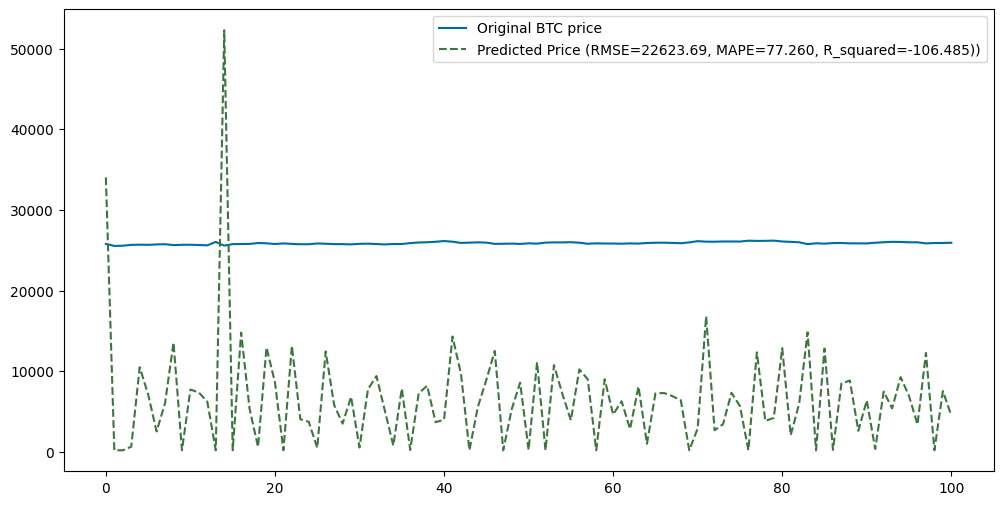

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f}))".format(rmse_error, float(mdape_error),r2)); 
ax.legend();
ax.set_title("");

In [38]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl_ml(ANN_model1, LinearRegression(), batch_size = 32,
                                                            callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 1s 4ms/step - loss: 435110240.0000 - val_loss: 777833600.0000 - lr: 5.0000e-04
Epoch 2/500
207/207 [==============================] - 1s 4ms/step - loss: 435105888.0000 - val_loss: 777827648.0000 - lr: 5.0000e-04
Epoch 3/500
207/207 [==============================] - 1s 4ms/step - loss: 435101632.0000 - val_loss: 777822080.0000 - lr: 5.0000e-04
Epoch 4/500
207/207 [==============================] - 1s 4ms/step - loss: 435097344.0000 - val_loss: 777816384.0000 - lr: 5.0000e-04
Epoch 5/500
207/207 [==============================] - 1s 3ms/step - loss: 435093248.0000 - val_loss: 777810688.0000 - lr: 5.0000e-04
Epoch 6/500
207/207 [==============================] - 1s 3ms/step - loss: 435088960.0000 - val_loss: 777804992.0000 - lr: 5.0000e-04
Epoch 7/500
207/207 [==============================] - 1s 4ms/step - loss: 435084800.0000 - val_loss: 777799424.0000 - lr: 5.0000e-04
Epoch 8/500
207/207 [==============================] - 1s 4ms/

Epoch 62/500
207/207 [==============================] - 1s 3ms/step - loss: 434852352.0000 - val_loss: 777485376.0000 - lr: 5.0000e-04
Epoch 63/500
207/207 [==============================] - 1s 3ms/step - loss: 434848096.0000 - val_loss: 777479680.0000 - lr: 5.0000e-04
Epoch 64/500
207/207 [==============================] - 1s 3ms/step - loss: 434843968.0000 - val_loss: 777474176.0000 - lr: 5.0000e-04
Epoch 65/500
207/207 [==============================] - 1s 3ms/step - loss: 434839680.0000 - val_loss: 777468352.0000 - lr: 5.0000e-04
Epoch 66/500
207/207 [==============================] - 1s 3ms/step - loss: 434835392.0000 - val_loss: 777462528.0000 - lr: 5.0000e-04
Epoch 67/500
207/207 [==============================] - 1s 3ms/step - loss: 434831136.0000 - val_loss: 777456960.0000 - lr: 5.0000e-04
Epoch 68/500
207/207 [==============================] - 1s 3ms/step - loss: 434827040.0000 - val_loss: 777451200.0000 - lr: 5.0000e-04
Epoch 69/500
207/207 [==============================] -

207/207 [==============================] - 1s 3ms/step - loss: 434345376.0000 - val_loss: 776801216.0000 - lr: 5.0000e-04
Epoch 183/500
207/207 [==============================] - 1s 3ms/step - loss: 434341152.0000 - val_loss: 776795328.0000 - lr: 5.0000e-04
Epoch 184/500
207/207 [==============================] - 1s 3ms/step - loss: 434337056.0000 - val_loss: 776789376.0000 - lr: 5.0000e-04
Epoch 185/500
207/207 [==============================] - 1s 3ms/step - loss: 434332768.0000 - val_loss: 776783936.0000 - lr: 5.0000e-04
Epoch 186/500
207/207 [==============================] - 1s 3ms/step - loss: 434328448.0000 - val_loss: 776778240.0000 - lr: 5.0000e-04
Epoch 187/500
207/207 [==============================] - 1s 3ms/step - loss: 434324352.0000 - val_loss: 776772608.0000 - lr: 5.0000e-04
Epoch 188/500
207/207 [==============================] - 1s 3ms/step - loss: 434320128.0000 - val_loss: 776766784.0000 - lr: 5.0000e-04
Epoch 189/500
207/207 [==============================] - 1s 4m

207/207 [==============================] - 1s 4ms/step - loss: 433838912.0000 - val_loss: 776117056.0000 - lr: 5.0000e-04
Epoch 303/500
207/207 [==============================] - 1s 3ms/step - loss: 433834720.0000 - val_loss: 776111296.0000 - lr: 5.0000e-04
Epoch 304/500
207/207 [==============================] - 1s 3ms/step - loss: 433830624.0000 - val_loss: 776105472.0000 - lr: 5.0000e-04
Epoch 305/500
207/207 [==============================] - 1s 3ms/step - loss: 433826304.0000 - val_loss: 776100032.0000 - lr: 5.0000e-04
Epoch 306/500
207/207 [==============================] - 1s 3ms/step - loss: 433822016.0000 - val_loss: 776094208.0000 - lr: 5.0000e-04
Epoch 307/500
207/207 [==============================] - 1s 5ms/step - loss: 433817760.0000 - val_loss: 776088448.0000 - lr: 5.0000e-04
Epoch 308/500
207/207 [==============================] - 1s 4ms/step - loss: 433813600.0000 - val_loss: 776082944.0000 - lr: 5.0000e-04
Epoch 309/500
207/207 [==============================] - 1s 4m

207/207 [==============================] - 1s 4ms/step - loss: 433332448.0000 - val_loss: 775433280.0000 - lr: 5.0000e-04
Epoch 423/500
207/207 [==============================] - 1s 4ms/step - loss: 433328352.0000 - val_loss: 775427520.0000 - lr: 5.0000e-04
Epoch 424/500
207/207 [==============================] - 1s 4ms/step - loss: 433324192.0000 - val_loss: 775421824.0000 - lr: 5.0000e-04
Epoch 425/500
207/207 [==============================] - 1s 4ms/step - loss: 433319936.0000 - val_loss: 775416192.0000 - lr: 5.0000e-04
Epoch 426/500
207/207 [==============================] - 1s 4ms/step - loss: 433315744.0000 - val_loss: 775410240.0000 - lr: 5.0000e-04
Epoch 427/500
207/207 [==============================] - 1s 4ms/step - loss: 433311616.0000 - val_loss: 775404608.0000 - lr: 5.0000e-04
Epoch 428/500
207/207 [==============================] - 1s 4ms/step - loss: 433307328.0000 - val_loss: 775399104.0000 - lr: 5.0000e-04
Epoch 429/500
207/207 [==============================] - 1s 4m

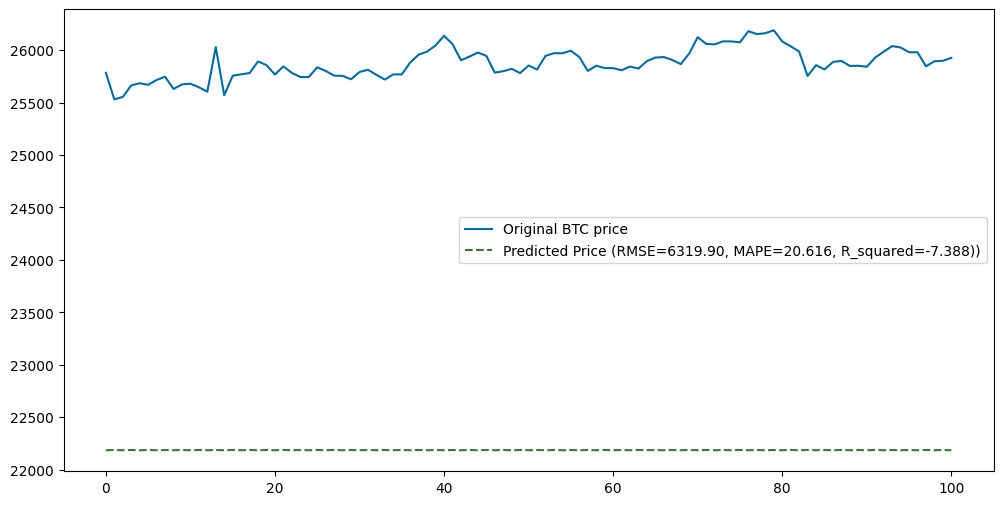

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f}))".format(rmse_error, float(mdape_error),r2)); 
ax.legend();
ax.set_title("");

##### LSTM

In [39]:
with tf.device('/cpu:0'):
    # Create sequential model from tensorflow.keras
    LSTM_model1 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    LSTM_model1.add(LSTM(units = 2, input_shape =(1, 1), return_sequences = False, 
                        kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
    LSTM_model1.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    LSTM_model1.compile(optimizer = Adam(), loss = 'mse')
    
    # Create sequential model from tensorflow.keras
    LSTM_model2 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    LSTM_model2.add(LSTM(units = 2, input_shape =(1, 1), return_sequences = False, 
                        kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
    # Add output layer with one 1 ouput neuron as this is regression problem
    LSTM_model2.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    LSTM_model2.compile(optimizer = Adam(), loss = 'mse')
    
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [41]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/1000
207/207 [==============================] - 4s 7ms/step - loss: 439345760.0000 - val_loss: 783540672.0000 - lr: 0.0010
Epoch 2/1000
207/207 [==============================] - 1s 5ms/step - loss: 439330656.0000 - val_loss: 783520512.0000 - lr: 0.0010
Epoch 3/1000
207/207 [==============================] - 1s 5ms/step - loss: 439315456.0000 - val_loss: 783500416.0000 - lr: 0.0010
Epoch 4/1000
207/207 [==============================] - 1s 6ms/step - loss: 439300640.0000 - val_loss: 783479872.0000 - lr: 0.0010
Epoch 5/1000
207/207 [==============================] - 1s 5ms/step - loss: 439285536.0000 - val_loss: 783459840.0000 - lr: 0.0010
Epoch 6/1000
207/207 [==============================] - 1s 6ms/step - loss: 439270752.0000 - val_loss: 783439552.0000 - lr: 0.0010
Epoch 7/1000
207/207 [==============================] - 1s 5ms/step - loss: 439255616.0000 - val_loss: 783419392.0000 - lr: 0.0010
Epoch 8/1000
207/207 [==============================] - 1s 5ms/step - loss: 4392406

Epoch 125/1000
207/207 [==============================] - 1s 5ms/step - loss: 437491648.0000 - val_loss: 781040384.0000 - lr: 0.0010
Epoch 126/1000
207/207 [==============================] - 1s 5ms/step - loss: 437476800.0000 - val_loss: 781020416.0000 - lr: 0.0010
Epoch 127/1000
207/207 [==============================] - 1s 5ms/step - loss: 437461664.0000 - val_loss: 781000192.0000 - lr: 0.0010
Epoch 128/1000
207/207 [==============================] - 1s 5ms/step - loss: 437446784.0000 - val_loss: 780979904.0000 - lr: 0.0010
Epoch 129/1000
207/207 [==============================] - 1s 5ms/step - loss: 437432032.0000 - val_loss: 780959808.0000 - lr: 0.0010
Epoch 130/1000
207/207 [==============================] - 1s 5ms/step - loss: 437417120.0000 - val_loss: 780939904.0000 - lr: 0.0010
Epoch 131/1000
207/207 [==============================] - 1s 5ms/step - loss: 437402016.0000 - val_loss: 780919616.0000 - lr: 0.0010
Epoch 132/1000
207/207 [==============================] - 1s 5ms/step

Epoch 248/1000
207/207 [==============================] - 1s 5ms/step - loss: 435657184.0000 - val_loss: 778564928.0000 - lr: 0.0010
Epoch 249/1000
207/207 [==============================] - 1s 5ms/step - loss: 435642368.0000 - val_loss: 778544832.0000 - lr: 0.0010
Epoch 250/1000
207/207 [==============================] - 1s 5ms/step - loss: 435627264.0000 - val_loss: 778524864.0000 - lr: 0.0010
Epoch 251/1000
207/207 [==============================] - 1s 5ms/step - loss: 435612576.0000 - val_loss: 778504512.0000 - lr: 0.0010
Epoch 252/1000
207/207 [==============================] - 1s 5ms/step - loss: 435597792.0000 - val_loss: 778484480.0000 - lr: 0.0010
Epoch 253/1000
207/207 [==============================] - 1s 5ms/step - loss: 435582784.0000 - val_loss: 778464512.0000 - lr: 0.0010
Epoch 254/1000
207/207 [==============================] - 1s 5ms/step - loss: 435567776.0000 - val_loss: 778444352.0000 - lr: 0.0010
Epoch 255/1000
207/207 [==============================] - 1s 5ms/step

Epoch 371/1000
207/207 [==============================] - 1s 5ms/step - loss: 433826848.0000 - val_loss: 776093248.0000 - lr: 0.0010
Epoch 372/1000
207/207 [==============================] - 1s 5ms/step - loss: 433812000.0000 - val_loss: 776073408.0000 - lr: 0.0010
Epoch 373/1000
207/207 [==============================] - 1s 5ms/step - loss: 433797152.0000 - val_loss: 776053248.0000 - lr: 0.0010
Epoch 374/1000
207/207 [==============================] - 1s 5ms/step - loss: 433782144.0000 - val_loss: 776033088.0000 - lr: 0.0010
Epoch 375/1000
207/207 [==============================] - 1s 6ms/step - loss: 433767296.0000 - val_loss: 776013056.0000 - lr: 0.0010
Epoch 376/1000
207/207 [==============================] - 1s 5ms/step - loss: 433752576.0000 - val_loss: 775992896.0000 - lr: 0.0010
Epoch 377/1000
207/207 [==============================] - 1s 5ms/step - loss: 433737664.0000 - val_loss: 775972928.0000 - lr: 0.0010
Epoch 378/1000
207/207 [==============================] - 1s 5ms/step

Epoch 494/1000
207/207 [==============================] - 1s 5ms/step - loss: 432000288.0000 - val_loss: 773625792.0000 - lr: 0.0010
Epoch 495/1000
207/207 [==============================] - 1s 5ms/step - loss: 431985504.0000 - val_loss: 773606080.0000 - lr: 0.0010
Epoch 496/1000
207/207 [==============================] - 1s 5ms/step - loss: 431970592.0000 - val_loss: 773585920.0000 - lr: 0.0010
Epoch 497/1000
207/207 [==============================] - 1s 5ms/step - loss: 431955808.0000 - val_loss: 773565824.0000 - lr: 0.0010
Epoch 498/1000
207/207 [==============================] - 1s 5ms/step - loss: 431940928.0000 - val_loss: 773545664.0000 - lr: 0.0010
Epoch 499/1000
207/207 [==============================] - 1s 5ms/step - loss: 431926208.0000 - val_loss: 773525696.0000 - lr: 0.0010
Epoch 500/1000
207/207 [==============================] - 1s 5ms/step - loss: 431911232.0000 - val_loss: 773505728.0000 - lr: 0.0010
Epoch 501/1000
207/207 [==============================] - 1s 5ms/step

Epoch 617/1000
207/207 [==============================] - 1s 5ms/step - loss: 430177632.0000 - val_loss: 771162432.0000 - lr: 0.0010
Epoch 618/1000
207/207 [==============================] - 1s 5ms/step - loss: 430162752.0000 - val_loss: 771142336.0000 - lr: 0.0010
Epoch 619/1000
207/207 [==============================] - 1s 5ms/step - loss: 430147936.0000 - val_loss: 771122112.0000 - lr: 0.0010
Epoch 620/1000
207/207 [==============================] - 1s 5ms/step - loss: 430133152.0000 - val_loss: 771102464.0000 - lr: 0.0010
Epoch 621/1000
207/207 [==============================] - 1s 5ms/step - loss: 430118432.0000 - val_loss: 771082240.0000 - lr: 0.0010
Epoch 622/1000
207/207 [==============================] - 1s 5ms/step - loss: 430103776.0000 - val_loss: 771062208.0000 - lr: 0.0010
Epoch 623/1000
207/207 [==============================] - 1s 5ms/step - loss: 430088864.0000 - val_loss: 771042304.0000 - lr: 0.0010
Epoch 624/1000
207/207 [==============================] - 1s 5ms/step

Epoch 740/1000
207/207 [==============================] - 1s 5ms/step - loss: 428360128.0000 - val_loss: 768704384.0000 - lr: 0.0010
Epoch 741/1000
207/207 [==============================] - 1s 5ms/step - loss: 428345344.0000 - val_loss: 768684352.0000 - lr: 0.0010
Epoch 742/1000
207/207 [==============================] - 1s 5ms/step - loss: 428330752.0000 - val_loss: 768664256.0000 - lr: 0.0010
Epoch 743/1000
207/207 [==============================] - 1s 5ms/step - loss: 428316000.0000 - val_loss: 768644480.0000 - lr: 0.0010
Epoch 744/1000
207/207 [==============================] - 1s 5ms/step - loss: 428301120.0000 - val_loss: 768624320.0000 - lr: 0.0010
Epoch 745/1000
207/207 [==============================] - 1s 5ms/step - loss: 428286432.0000 - val_loss: 768604544.0000 - lr: 0.0010
Epoch 746/1000
207/207 [==============================] - 1s 5ms/step - loss: 428271648.0000 - val_loss: 768584384.0000 - lr: 0.0010
Epoch 747/1000
207/207 [==============================] - 1s 5ms/step

Epoch 863/1000
207/207 [==============================] - 1s 5ms/step - loss: 426546432.0000 - val_loss: 766249856.0000 - lr: 0.0010
Epoch 864/1000
207/207 [==============================] - 1s 5ms/step - loss: 426531744.0000 - val_loss: 766229824.0000 - lr: 0.0010
Epoch 865/1000
207/207 [==============================] - 1s 5ms/step - loss: 426516896.0000 - val_loss: 766209920.0000 - lr: 0.0010
Epoch 866/1000
207/207 [==============================] - 1s 5ms/step - loss: 426502208.0000 - val_loss: 766189952.0000 - lr: 0.0010
Epoch 867/1000
207/207 [==============================] - 1s 5ms/step - loss: 426487424.0000 - val_loss: 766170112.0000 - lr: 0.0010
Epoch 868/1000
207/207 [==============================] - 1s 5ms/step - loss: 426472672.0000 - val_loss: 766149952.0000 - lr: 0.0010
Epoch 869/1000
207/207 [==============================] - 1s 5ms/step - loss: 426457984.0000 - val_loss: 766130112.0000 - lr: 0.0010
Epoch 870/1000
207/207 [==============================] - 1s 5ms/step

Epoch 986/1000
207/207 [==============================] - 1s 5ms/step - loss: 424736320.0000 - val_loss: 763798912.0000 - lr: 0.0010
Epoch 987/1000
207/207 [==============================] - 1s 5ms/step - loss: 424721568.0000 - val_loss: 763779008.0000 - lr: 0.0010
Epoch 988/1000
207/207 [==============================] - 1s 5ms/step - loss: 424706912.0000 - val_loss: 763759104.0000 - lr: 0.0010
Epoch 989/1000
207/207 [==============================] - 1s 5ms/step - loss: 424692256.0000 - val_loss: 763739328.0000 - lr: 0.0010
Epoch 990/1000
207/207 [==============================] - 1s 5ms/step - loss: 424677376.0000 - val_loss: 763719360.0000 - lr: 0.0010
Epoch 991/1000
207/207 [==============================] - 1s 5ms/step - loss: 424662848.0000 - val_loss: 763699392.0000 - lr: 0.0010
Epoch 992/1000
207/207 [==============================] - 1s 5ms/step - loss: 424648032.0000 - val_loss: 763679424.0000 - lr: 0.0010
Epoch 993/1000
207/207 [==============================] - 1s 5ms/step

207/207 [==============================] - 1s 5ms/step - loss: 422155008.0000 - val_loss: 760297088.0000 - lr: 0.0010
Epoch 110/1000
207/207 [==============================] - 1s 5ms/step - loss: 422134080.0000 - val_loss: 760268864.0000 - lr: 0.0010
Epoch 111/1000
207/207 [==============================] - 1s 5ms/step - loss: 422112896.0000 - val_loss: 760240448.0000 - lr: 0.0010
Epoch 112/1000
207/207 [==============================] - 1s 5ms/step - loss: 422092096.0000 - val_loss: 760211904.0000 - lr: 0.0010
Epoch 113/1000
207/207 [==============================] - 1s 5ms/step - loss: 422071168.0000 - val_loss: 760183744.0000 - lr: 0.0010
Epoch 114/1000
207/207 [==============================] - 1s 5ms/step - loss: 422049984.0000 - val_loss: 760155072.0000 - lr: 0.0010
Epoch 115/1000
207/207 [==============================] - 1s 5ms/step - loss: 422029184.0000 - val_loss: 760126656.0000 - lr: 0.0010
Epoch 116/1000
207/207 [==============================] - 1s 5ms/step - loss: 422008

Epoch 171/1000
207/207 [==============================] - 1s 5ms/step - loss: 420854624.0000 - val_loss: 758534272.0000 - lr: 0.0010
Epoch 172/1000
207/207 [==============================] - 1s 5ms/step - loss: 420833600.0000 - val_loss: 758505792.0000 - lr: 0.0010
Epoch 173/1000
207/207 [==============================] - 1s 5ms/step - loss: 420812576.0000 - val_loss: 758477376.0000 - lr: 0.0010
Epoch 174/1000
207/207 [==============================] - 1s 5ms/step - loss: 420791680.0000 - val_loss: 758448896.0000 - lr: 0.0010
Epoch 175/1000
207/207 [==============================] - 1s 5ms/step - loss: 420770848.0000 - val_loss: 758420544.0000 - lr: 0.0010
Epoch 176/1000
207/207 [==============================] - 1s 5ms/step - loss: 420749824.0000 - val_loss: 758392128.0000 - lr: 0.0010
Epoch 177/1000
207/207 [==============================] - 1s 5ms/step - loss: 420728864.0000 - val_loss: 758363648.0000 - lr: 0.0010
Epoch 178/1000
207/207 [==============================] - 1s 5ms/step

Epoch 294/1000
207/207 [==============================] - 1s 5ms/step - loss: 418280832.0000 - val_loss: 755042624.0000 - lr: 0.0010
Epoch 295/1000
207/207 [==============================] - 1s 5ms/step - loss: 418259968.0000 - val_loss: 755014400.0000 - lr: 0.0010
Epoch 296/1000
207/207 [==============================] - 1s 5ms/step - loss: 418238976.0000 - val_loss: 754985984.0000 - lr: 0.0010
Epoch 297/1000
207/207 [==============================] - 1s 5ms/step - loss: 418218400.0000 - val_loss: 754957760.0000 - lr: 0.0010
Epoch 298/1000
207/207 [==============================] - 1s 5ms/step - loss: 418197280.0000 - val_loss: 754929280.0000 - lr: 0.0010
Epoch 299/1000
207/207 [==============================] - 1s 5ms/step - loss: 418176384.0000 - val_loss: 754900864.0000 - lr: 0.0010
Epoch 300/1000
207/207 [==============================] - 1s 5ms/step - loss: 418155584.0000 - val_loss: 754872512.0000 - lr: 0.0010
Epoch 301/1000
207/207 [==============================] - 1s 5ms/step

Epoch 417/1000
207/207 [==============================] - 1s 5ms/step - loss: 415715872.0000 - val_loss: 751560128.0000 - lr: 0.0010
Epoch 418/1000
207/207 [==============================] - 1s 5ms/step - loss: 415695104.0000 - val_loss: 751531648.0000 - lr: 0.0010
Epoch 419/1000
207/207 [==============================] - 1s 5ms/step - loss: 415674080.0000 - val_loss: 751503360.0000 - lr: 0.0010
Epoch 420/1000
207/207 [==============================] - 1s 5ms/step - loss: 415653248.0000 - val_loss: 751475136.0000 - lr: 0.0010
Epoch 421/1000
207/207 [==============================] - 1s 5ms/step - loss: 415632672.0000 - val_loss: 751446976.0000 - lr: 0.0010
Epoch 422/1000
207/207 [==============================] - 1s 5ms/step - loss: 415611552.0000 - val_loss: 751418560.0000 - lr: 0.0010
Epoch 423/1000
207/207 [==============================] - 1s 5ms/step - loss: 415590848.0000 - val_loss: 751390208.0000 - lr: 0.0010
Epoch 424/1000
207/207 [==============================] - 1s 5ms/step

Epoch 540/1000
207/207 [==============================] - 1s 5ms/step - loss: 413159296.0000 - val_loss: 748085888.0000 - lr: 0.0010
Epoch 541/1000
207/207 [==============================] - 1s 5ms/step - loss: 413138304.0000 - val_loss: 748057920.0000 - lr: 0.0010
Epoch 542/1000
207/207 [==============================] - 1s 5ms/step - loss: 413117632.0000 - val_loss: 748029568.0000 - lr: 0.0010
Epoch 543/1000
207/207 [==============================] - 1s 5ms/step - loss: 413096800.0000 - val_loss: 748001472.0000 - lr: 0.0010
Epoch 544/1000
207/207 [==============================] - 1s 5ms/step - loss: 413076064.0000 - val_loss: 747973248.0000 - lr: 0.0010
Epoch 545/1000
207/207 [==============================] - 1s 5ms/step - loss: 413055552.0000 - val_loss: 747945088.0000 - lr: 0.0010
Epoch 546/1000
207/207 [==============================] - 1s 5ms/step - loss: 413034688.0000 - val_loss: 747916736.0000 - lr: 0.0010
Epoch 547/1000
207/207 [==============================] - 1s 5ms/step

Epoch 663/1000
207/207 [==============================] - 1s 5ms/step - loss: 410610976.0000 - val_loss: 744620352.0000 - lr: 0.0010
Epoch 664/1000
207/207 [==============================] - 1s 5ms/step - loss: 410590080.0000 - val_loss: 744592256.0000 - lr: 0.0010
Epoch 665/1000
207/207 [==============================] - 1s 5ms/step - loss: 410569536.0000 - val_loss: 744564096.0000 - lr: 0.0010
Epoch 666/1000
207/207 [==============================] - 1s 5ms/step - loss: 410548800.0000 - val_loss: 744535936.0000 - lr: 0.0010
Epoch 667/1000
207/207 [==============================] - 1s 5ms/step - loss: 410528224.0000 - val_loss: 744507840.0000 - lr: 0.0010
Epoch 668/1000
207/207 [==============================] - 1s 5ms/step - loss: 410507520.0000 - val_loss: 744479616.0000 - lr: 0.0010
Epoch 669/1000
207/207 [==============================] - 1s 5ms/step - loss: 410486912.0000 - val_loss: 744451584.0000 - lr: 0.0010
Epoch 670/1000
207/207 [==============================] - 1s 5ms/step

Epoch 786/1000
207/207 [==============================] - 1s 5ms/step - loss: 408070912.0000 - val_loss: 741163200.0000 - lr: 0.0010
Epoch 787/1000
207/207 [==============================] - 1s 5ms/step - loss: 408050272.0000 - val_loss: 741134912.0000 - lr: 0.0010
Epoch 788/1000
207/207 [==============================] - 1s 5ms/step - loss: 408029472.0000 - val_loss: 741107008.0000 - lr: 0.0010
Epoch 789/1000
207/207 [==============================] - 1s 5ms/step - loss: 408008992.0000 - val_loss: 741078784.0000 - lr: 0.0010
Epoch 790/1000
207/207 [==============================] - 1s 5ms/step - loss: 407988384.0000 - val_loss: 741050752.0000 - lr: 0.0010
Epoch 791/1000
207/207 [==============================] - 1s 5ms/step - loss: 407967872.0000 - val_loss: 741022784.0000 - lr: 0.0010
Epoch 792/1000
207/207 [==============================] - 1s 5ms/step - loss: 407947168.0000 - val_loss: 740994688.0000 - lr: 0.0010
Epoch 793/1000
207/207 [==============================] - 1s 5ms/step

Epoch 909/1000
207/207 [==============================] - 1s 5ms/step - loss: 405538720.0000 - val_loss: 737713728.0000 - lr: 0.0010
Epoch 910/1000
207/207 [==============================] - 1s 5ms/step - loss: 405518368.0000 - val_loss: 737685760.0000 - lr: 0.0010
Epoch 911/1000
207/207 [==============================] - 1s 5ms/step - loss: 405497728.0000 - val_loss: 737657728.0000 - lr: 0.0010
Epoch 912/1000
207/207 [==============================] - 1s 5ms/step - loss: 405477120.0000 - val_loss: 737629760.0000 - lr: 0.0010
Epoch 913/1000
207/207 [==============================] - 1s 5ms/step - loss: 405456608.0000 - val_loss: 737601664.0000 - lr: 0.0010
Epoch 914/1000
207/207 [==============================] - 1s 5ms/step - loss: 405436064.0000 - val_loss: 737573824.0000 - lr: 0.0010
Epoch 915/1000
207/207 [==============================] - 1s 5ms/step - loss: 405415392.0000 - val_loss: 737545792.0000 - lr: 0.0010
Epoch 916/1000
207/207 [==============================] - 1s 5ms/step

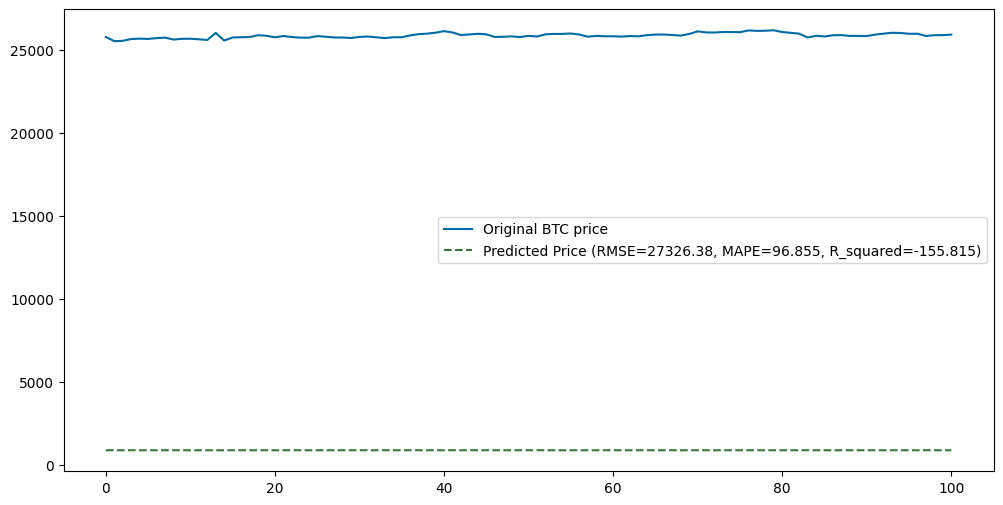

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

In [43]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl_ml(LSTM_model1, LinearRegression(), batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 1s 5ms/step - loss: 424515808.0000 - val_loss: 763500352.0000 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 1s 5ms/step - loss: 424501152.0000 - val_loss: 763480192.0000 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 1s 5ms/step - loss: 424486336.0000 - val_loss: 763460352.0000 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 1s 5ms/step - loss: 424471808.0000 - val_loss: 763440768.0000 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 1s 5ms/step - loss: 424457120.0000 - val_loss: 763420608.0000 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 1s 5ms/step - loss: 424442368.0000 - val_loss: 763400640.0000 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 1s 5ms/step - loss: 424427520.0000 - val_loss: 763380800.0000 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 1s 5ms/step - loss: 424412896.0000 

207/207 [==============================] - 1s 5ms/step - loss: 422695200.0000 - val_loss: 761033600.0000 - lr: 0.0010
Epoch 126/500
207/207 [==============================] - 1s 5ms/step - loss: 422680544.0000 - val_loss: 761013760.0000 - lr: 0.0010
Epoch 127/500
207/207 [==============================] - 1s 5ms/step - loss: 422665792.0000 - val_loss: 760993984.0000 - lr: 0.0010
Epoch 128/500
207/207 [==============================] - 1s 5ms/step - loss: 422651232.0000 - val_loss: 760974016.0000 - lr: 0.0010
Epoch 129/500
207/207 [==============================] - 1s 5ms/step - loss: 422636512.0000 - val_loss: 760954176.0000 - lr: 0.0010
Epoch 130/500
207/207 [==============================] - 1s 5ms/step - loss: 422621888.0000 - val_loss: 760934464.0000 - lr: 0.0010
Epoch 131/500
207/207 [==============================] - 1s 5ms/step - loss: 422607360.0000 - val_loss: 760914432.0000 - lr: 0.0010
Epoch 132/500
207/207 [==============================] - 1s 5ms/step - loss: 422592512.000

207/207 [==============================] - 1s 5ms/step - loss: 420878624.0000 - val_loss: 758571200.0000 - lr: 0.0010
Epoch 250/500
207/207 [==============================] - 1s 5ms/step - loss: 420864192.0000 - val_loss: 758551616.0000 - lr: 0.0010
Epoch 251/500
207/207 [==============================] - 1s 5ms/step - loss: 420849568.0000 - val_loss: 758531328.0000 - lr: 0.0010
Epoch 252/500
207/207 [==============================] - 1s 5ms/step - loss: 420834912.0000 - val_loss: 758511616.0000 - lr: 0.0010
Epoch 253/500
207/207 [==============================] - 1s 5ms/step - loss: 420820224.0000 - val_loss: 758491904.0000 - lr: 0.0010
Epoch 254/500
207/207 [==============================] - 1s 5ms/step - loss: 420805600.0000 - val_loss: 758472000.0000 - lr: 0.0010
Epoch 255/500
207/207 [==============================] - 1s 5ms/step - loss: 420790784.0000 - val_loss: 758452160.0000 - lr: 0.0010
Epoch 256/500
207/207 [==============================] - 1s 5ms/step - loss: 420776224.000

207/207 [==============================] - 1s 5ms/step - loss: 419064896.0000 - val_loss: 756110976.0000 - lr: 0.0010
Epoch 374/500
207/207 [==============================] - 1s 5ms/step - loss: 419050304.0000 - val_loss: 756091072.0000 - lr: 0.0010
Epoch 375/500
207/207 [==============================] - 1s 5ms/step - loss: 419035712.0000 - val_loss: 756071232.0000 - lr: 0.0010
Epoch 376/500
207/207 [==============================] - 1s 5ms/step - loss: 419021120.0000 - val_loss: 756051520.0000 - lr: 0.0010
Epoch 377/500
207/207 [==============================] - 1s 5ms/step - loss: 419006656.0000 - val_loss: 756031808.0000 - lr: 0.0010
Epoch 378/500
207/207 [==============================] - 1s 5ms/step - loss: 418991936.0000 - val_loss: 756011776.0000 - lr: 0.0010
Epoch 379/500
207/207 [==============================] - 1s 5ms/step - loss: 418977280.0000 - val_loss: 755991936.0000 - lr: 0.0010
Epoch 380/500
207/207 [==============================] - 1s 5ms/step - loss: 418962560.000

207/207 [==============================] - 1s 5ms/step - loss: 417255072.0000 - val_loss: 753654528.0000 - lr: 0.0010
Epoch 498/500
207/207 [==============================] - 1s 5ms/step - loss: 417240608.0000 - val_loss: 753634752.0000 - lr: 0.0010
Epoch 499/500
207/207 [==============================] - 1s 5ms/step - loss: 417225888.0000 - val_loss: 753614912.0000 - lr: 0.0010
Epoch 500/500
16/16 [==============================] - 0s 2ms/step


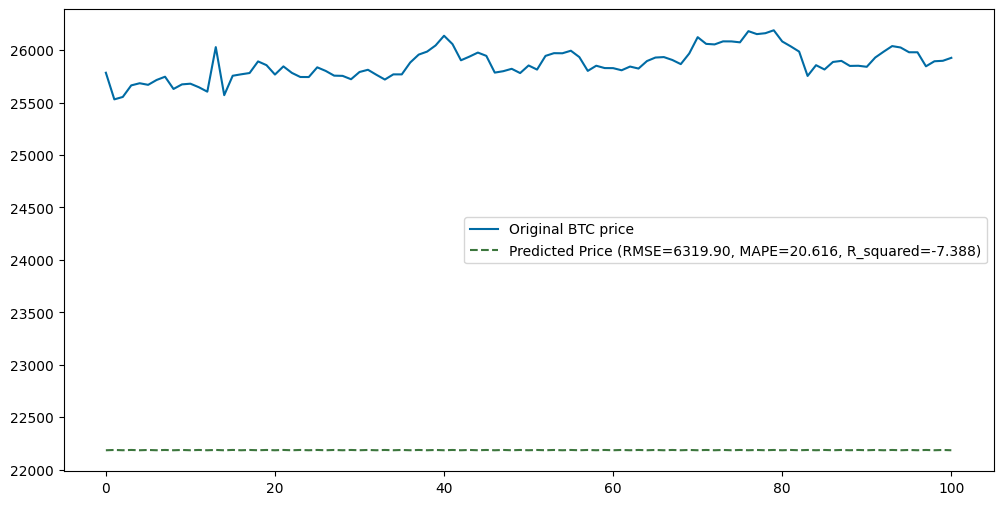

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

##### TKAN

In [62]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Enable mixed-precision training for speedup on compatible hardware
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Enable XLA (Accelerated Linear Algebra) for additional speedup
tf.config.optimizer.set_jit(True)

# Define Deep Spline Activation with tf.function for graph execution
class DeepSplineActivation(layers.Layer):
    def __init__(self, num_knots=10, **kwargs):
        super(DeepSplineActivation, self).__init__(**kwargs)
        self.num_knots = num_knots

    def build(self, input_shape):
        self.knots = self.add_weight(name='knots', 
                                     shape=(self.num_knots,),
                                     initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                     trainable=True)
        self.coefficients = self.add_weight(name='coefficients', 
                                            shape=(self.num_knots-1,),
                                            initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                            trainable=True)
        super(DeepSplineActivation, self).build(input_shape)

    @tf.function
    def call(self, inputs):
        # Assuming knots are pre-sorted during build time, sorting is not needed in every call
        sorted_knots = tf.sort(self.knots)
        differences = tf.nn.relu(inputs[..., None] - sorted_knots)
        spline_output = tf.reduce_sum(differences[..., :-1] * self.coefficients, axis=-1)
        return spline_output

# Define Kolmogorov-Arnold Network (KAN) with multiple neurons
def build_kan_model(input_shape, hidden_units=64, output_units=1, num_knots=10, num_neurons=5):
    inputs = tf.keras.Input(shape=input_shape)
    
    kan_neurons_outputs = []
    deep_spline_activation = DeepSplineActivation(num_knots=num_knots)
    
    for _ in range(num_neurons):
        x = layers.Dense(hidden_units)(inputs)
        x = layers.BatchNormalization()(x)  # Add BatchNormalization for faster convergence
        x = deep_spline_activation(x)
        
        # Recurrent network (RNN)
        x = layers.SimpleRNN(_, return_sequences=False)(x)
        x = layers.Dense(hidden_units)(x)
        x = layers.BatchNormalization()(x)  # Add BatchNormalization for faster convergence
        x = deep_spline_activation(x)
        
        kan_neurons_outputs.append(x)
    
    aggregated_output = layers.Concatenate()(kan_neurons_outputs)
    
    outputs = layers.Dense(output_units)(aggregated_output)
    
    kan_model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return kan_model

# Define the LSTM model
def build_lstm_model(input_shape, lstm_units=64):
    model = models.Sequential()
    model.add(layers.LSTM(lstm_units, return_sequences=True, input_shape=input_shape))
    model.add(layers.LSTM(lstm_units))
    return model

# Combine LSTM and KAN models with multiple KAN neurons
def build_combined_model(input_shape, lstm_units=64, hidden_units=64, output_units=1, num_knots=10, num_neurons=5):
    lstm_input = tf.keras.Input(shape=input_shape)
    
    lstm_model = build_lstm_model(input_shape, lstm_units=lstm_units)
    lstm_output = lstm_model(lstm_input)
    
    # Flatten the output instead of using reshape (more efficient)
    reshaped_output = lstm_output#layers.Flatten()(lstm_output)
    
    kan_model = build_kan_model((None, reshaped_output.shape[-1],), hidden_units=hidden_units, output_units=output_units, num_knots=num_knots, num_neurons=num_neurons)
    kan_output = kan_model(reshaped_output)
    
    combined_model = tf.keras.Model(inputs=lstm_input, outputs=kan_output)
    return combined_model

In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
def hybrid_tkan(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR], epochs1 = 500, epochs2 = 500):
    trend_X_train_kan = trend_X_train
    y_train_kan = y_train
    trend_X_test_kan = trend_X_test
    resid_X_train_kan = resid_X_train
    resid_X_test_kan = resid_X_test
    
    scaler1 = MinMaxScaler()
    trend_X_train_kan = scaler1.fit_transform(trend_X_train_kan)
    trend_X_test_kan = scaler1.transform(trend_X_test_kan)
    y_train_kan = scaler1.transform(y_train_kan)
    
    scaler2 = MinMaxScaler()
    resid_X_train_kan = scaler2.fit_transform(resid_X_train_kan)
    resid_X_test_kan = scaler2.transform(resid_X_test_kan)
    
#     history1 = model1.fit(trend_X_train_kan, y_train_kan, epochs = 1000, batch_size = batch_size, validation_split = 0.2,
#                          shuffle = False, callbacks = callbacks)
    history1 = model1.fit(trend_X_train_kan, y_train_kan, epochs = epochs1, batch_size = batch_size, callbacks = callbacks)
    y_fit = model1.predict(trend_X_train_kan)
    y_pred = model1.predict(trend_X_test_kan)
    
    y_fit = scaler2.inverse_transform(y_fit.reshape(-1, 1))
    y_pred = scaler2.inverse_transform(y_pred.reshape(-1, 1))

    y_resid = y_train - y_fit
    y_resid = scaler2.transform(y_resid)

#     history2 = model2.fit(resid_X_train_kan, y_resid, epochs = epochs, batch_size = batch_size, validation_split = 0.2,
#                          shuffle = False, callbacks = callbacks)

#     resid_X_train_kan = resid_X_train_kan.reshape(resid_X_train_kan.shape[0], 1, 1)
#     resid_X_test_kan = resid_X_test_kan.reshape(resid_X_train_kan.shape[0], 1, 1)

    history2 = model2.fit(resid_X_train_kan, y_resid, epochs = epochs2, batch_size = batch_size, callbacks = callbacks)
    new_pred = model2.predict(resid_X_test_kan)
    new_pred = scaler2.inverse_transform(new_pred.reshape(-1, 1))
    
    y_pred_boosted = new_pred + y_pred + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted), r2_score(y_test, y_pred_boosted)

In [64]:
TKAN1 = build_combined_model(input_shape = (1, 1), lstm_units = 1, hidden_units = 1, output_units = 1,
                             num_knots = 2, num_neurons = 1)
TKAN1.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))

In [65]:
TKAN2 = build_combined_model(input_shape = (1, 1), lstm_units = 1, hidden_units = 1, output_units = 1,
                             num_knots = 2, num_neurons = 10)
TKAN2.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))

In [66]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

predicted_value, rmse_error, mdape_error, r2 = hybrid_tkan(TKAN1, TKAN2, batch_size = 32, callbacks = [callback, REDUCE_LR],
                                                           epochs1 = 150, epochs2 = 150)

Epoch 1/150
259/259 [==============================] - 15s 15ms/step - loss: 0.2113 - lr: 1.0000e-04
Epoch 2/150
259/259 [==============================] - 3s 13ms/step - loss: 0.1775 - lr: 1.0000e-04
Epoch 3/150
259/259 [==============================] - 2s 9ms/step - loss: 0.1473 - lr: 1.0000e-04
Epoch 4/150
259/259 [==============================] - 2s 9ms/step - loss: 0.1217 - lr: 1.0000e-04
Epoch 5/150
259/259 [==============================] - 2s 9ms/step - loss: 0.1014 - lr: 1.0000e-04
Epoch 6/150
259/259 [==============================] - 2s 9ms/step - loss: 0.0868 - lr: 1.0000e-04
Epoch 7/150
259/259 [==============================] - 2s 9ms/step - loss: 0.0776 - lr: 1.0000e-04
Epoch 8/150
259/259 [==============================] - 3s 10ms/step - loss: 0.0726 - lr: 1.0000e-04
Epoch 9/150
259/259 [==============================] - 2s 9ms/step - loss: 0.0703 - lr: 1.0000e-04
Epoch 10/150
259/259 [==============================] - 2s 9ms/step - loss: 0.0694 - lr: 1.0000e-04
Epoch

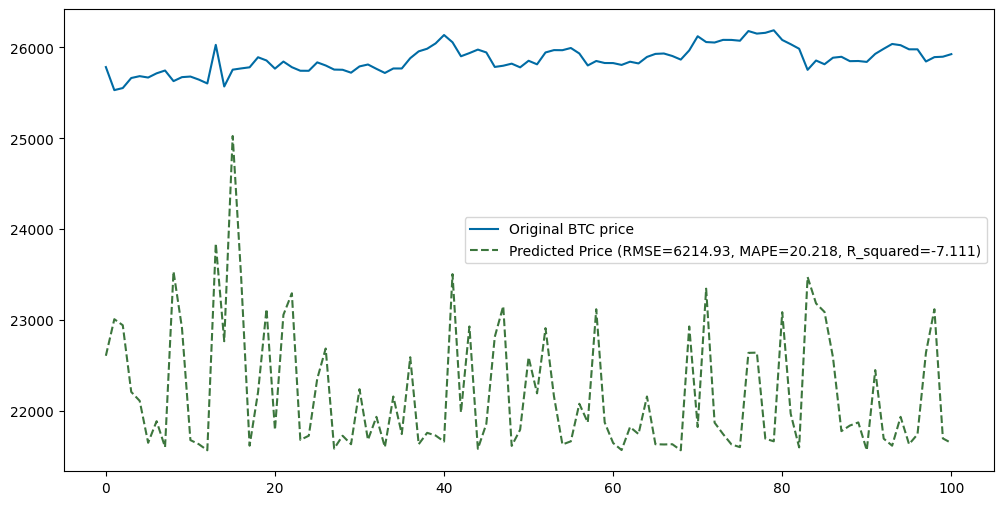

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

In [68]:
def hybrid_tkan_ml(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR], epochs = 500):
    trend_X_train_kan = trend_X_train
    y_train_kan = y_train
    trend_X_test_kan = trend_X_test
    
    scaler1 = MinMaxScaler()
    trend_X_train_kan = scaler1.fit_transform(trend_X_train_kan)
    trend_X_test_kan = scaler1.transform(trend_X_test_kan)
    y_train_kan = scaler1.transform(y_train_kan)
    
    history1 = model1.fit(trend_X_train_kan, y_train_kan, epochs = epochs, batch_size = batch_size, callbacks = callbacks)
    #history1 = model1.fit(trend_X_train_kan, y_train_kan, epochs = epochs, batch_size = batch_size)
    y_fit = model1.predict(trend_X_train_kan)
    y_pred = model1.predict(trend_X_test_kan)
    
    y_fit = scaler1.inverse_transform(y_fit.reshape(-1, 1))
    y_pred = scaler1.inverse_transform(y_pred.reshape(-1, 1))

    y_resid = y_train - y_fit

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted), r2_score(y_test, y_pred_boosted)

In [74]:
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

TKAN1 = build_combined_model(input_shape = (1, 1), lstm_units = 1, hidden_units = 2, output_units = 1,
                             num_knots = 2, num_neurons = 1)
TKAN1.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.0001))
lr = LinearRegression()

In [75]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_tkan_ml(TKAN1, lr, batch_size = 32, callbacks = [callback, REDUCE_LR],
                                                           epochs = 100)

Epoch 1/100
259/259 [==============================] - 7s 10ms/step - loss: 0.6236 - lr: 1.0000e-04
Epoch 2/100
259/259 [==============================] - 3s 13ms/step - loss: 0.4925 - lr: 1.0000e-04
Epoch 3/100
259/259 [==============================] - 2s 9ms/step - loss: 0.3964 - lr: 1.0000e-04
Epoch 4/100
259/259 [==============================] - 2s 9ms/step - loss: 0.3238 - lr: 1.0000e-04
Epoch 5/100
259/259 [==============================] - 2s 9ms/step - loss: 0.2682 - lr: 1.0000e-04
Epoch 6/100
259/259 [==============================] - 2s 9ms/step - loss: 0.2246 - lr: 1.0000e-04
Epoch 7/100
259/259 [==============================] - 2s 9ms/step - loss: 0.1900 - lr: 1.0000e-04
Epoch 8/100
259/259 [==============================] - 2s 9ms/step - loss: 0.1622 - lr: 1.0000e-04
Epoch 9/100
259/259 [==============================] - 3s 10ms/step - loss: 0.1397 - lr: 1.0000e-04
Epoch 10/100
259/259 [==============================] - 2s 9ms/step - loss: 0.1251 - lr: 1.0000e-04
Epoch 

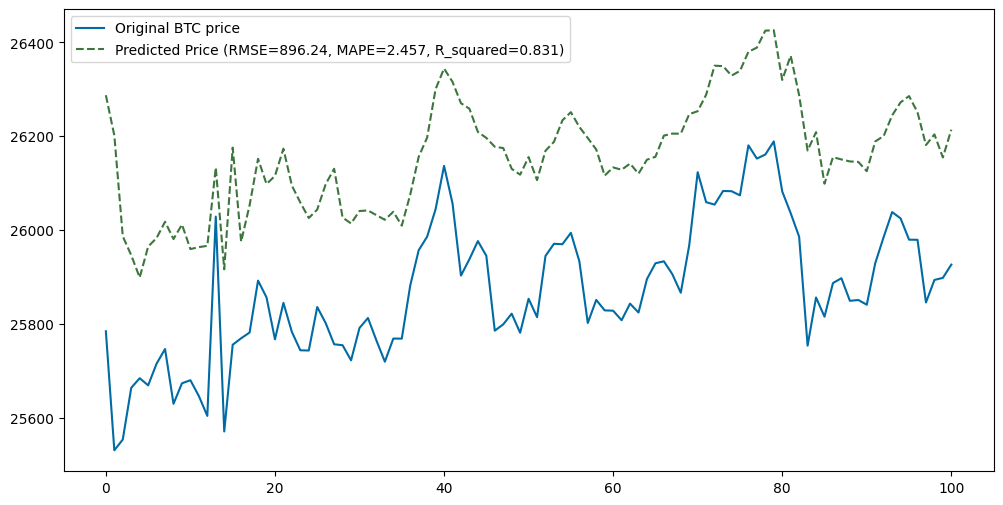

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

## Multivariate methods

In [36]:
df['day_of_week'] = 1
for i in range(len(df.index)):
    if df['day'][i] == 'Sunday':
        df['day_of_week'][i] = 1
    elif df['day'][i] == 'Monday':
        df['day_of_week'][i] = 2
    elif df['day'][i] == 'Tuesday':
        df['day_of_week'][i] = 3
    elif df['day'][i] == 'Wednesday':
        df['day_of_week'][i] = 4
    elif df['day'][i] == 'Thursday':
        df['day_of_week'][i] = 5
    elif df['day'][i] == 'Friday':
        df['day_of_week'][i] = 6
    elif df['day'][i] == 'Saturday':
        df['day_of_week'][i] = 7

In [37]:
df.drop('day', axis = 1, inplace = True)
new_df = df.copy()
new_df['trend'] = trend_estimate
new_df['seasonal'] = seasonal_estimate
new_df['resid'] = residual_estimate

In [38]:
new_df['close'] = new_df['close'].shift(-1)
new_df = new_df.dropna()

In [39]:
new_df.columns

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'hourly_volume', 'top_tier_volume_quote', 'top_tier_volume_base',
       'top_tier_volume_total', 'cccagg_volume_quote', 'cccagg_volume_base',
       'cccagg_volume_total', 'total_volume_quote', 'total_volume_base',
       'total_volume_total', 'eth_open', 'eth_close', 'bnb_open', 'bnb_close',
       'usdt_open', 'usdt_close', 'sol_open', 'sol_close', 'hourly_return',
       '3_hourly_return', '5_hourly_return', '12_hourly_return',
       '3_hourly_volatility', '5_hourly_volatility', '12_hourly_volatility',
       'daily_volatility', 'trend_score', 'Compound_score', 'Polarity',
       'time_of_the_day', 'day_of_month', 'weekend', 'day_of_week', 'trend',
       'seasonal', 'resid'],
      dtype='object')

##### With base features

In [40]:
#trend = new_df.drop(['seasonal', 'resid', 'close'], axis = 1)
trend = new_df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'hourly_volume', 'hourly_return', 'trend']]
seasonal = new_df[['seasonal']]
resid = new_df[['resid']]
y = new_df[['close']]

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)
seasonal_X_train, seasonal_X_test = train_test_split(seasonal, test_size = 500, shuffle = False)

In [41]:
trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

((8259, 8),
 (500, 8),
 (8259, 1),
 (500, 1),
 (8259, 1),
 (500, 1),
 (8259, 1),
 (500, 1))

In [42]:
# trend_X_train = trend_X_train.reshape(-1, 1)
# trend_X_test = trend_X_test.reshape(-1, 1)
# resid_X_train = resid_X_train.reshape(-1, 1)
# resid_X_test = resid_X_test.reshape(-1, 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [43]:
# trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

In [44]:
# Functions for transformation
y_train_original = y_train.copy()
y_test_original = y_test.copy()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

cols1 = trend_X_train.columns
trend_enc = RobustScaler()
trend_X_train[cols1] = trend_enc.fit_transform(trend_X_train[cols1])
trend_X_test[cols1] = trend_enc.transform(trend_X_test[cols1])

cols2 = y_train.columns
y_enc = RobustScaler()
y_train[cols2] = y_enc.fit_transform(y_train[cols2])
y_test[cols2] = y_enc.transform(y_test[cols2])

In [45]:
# Fit trend model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(trend_X_train, y_train)

LinearRegression(fit_intercept=False)

In [46]:
y_fit = model.predict(trend_X_train)
y_pred = model.predict(trend_X_test)

In [47]:
y_pred.shape

(500, 1)

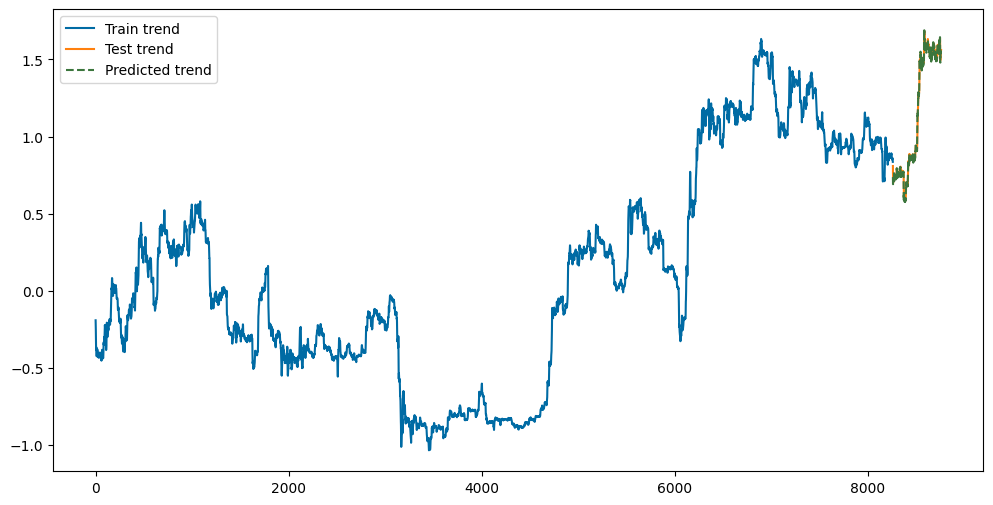

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(0, len(new_df.index) - 500), trend_X_train['trend'][:len(new_df.index) - 500], label = 'Train trend');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), trend_X_test['trend'], label = 'Test trend');
#ax.plot(np.arange(0, len(df.index) - 500), y_fit, linestyle='--', color='#ff7823');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), y_pred, linestyle='--', color='#3c763d', label = 'Predicted trend'); 
ax.legend();
ax.set_title("");

In [49]:
rmse(trend_X_test['trend'], y_pred)

0.018131868938531477

In [50]:
y_pred = y_enc.inverse_transform(y_pred)
y_fit = y_enc.inverse_transform(y_fit)

In [51]:
# Create residuals (the collection of detrended series) from the training set
y_resid = y_train_original - y_fit

In [52]:
# Train XGBoost on the residuals
xgb = LinearRegression()
xgb.fit(resid_X_train, y_resid)

LinearRegression()

In [53]:
# Add the predicted residuals onto the predicted trends
y_pred_boosted = xgb.predict(resid_X_test).reshape(-1, 1) + y_pred + seasonal_X_test

In [54]:
rmse_error = rmse(y_test_original, y_pred_boosted)

In [55]:
mape_error = MAPE(y_test_original.values, y_pred_boosted.values)
r2 = r2_score(y_test_original.values, y_pred_boosted.values)

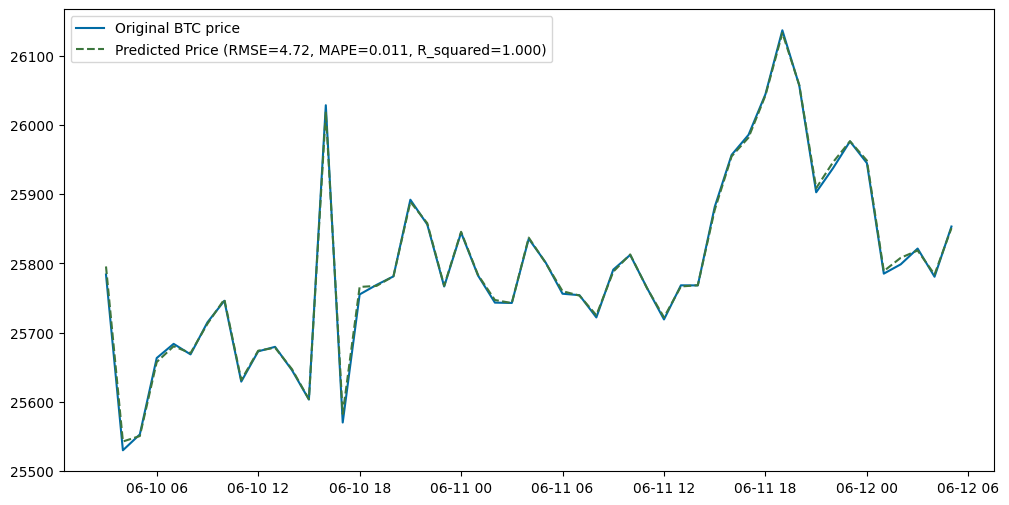

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:51], label = 'Original BTC price');
ax.plot(y_pred_boosted[0:51], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

##### Search for model combination

In [57]:
def hybrid(model1, model2):
    model1.fit(trend_X_train, y_train)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred.reshape(-1,1))
    y_fit = y_enc.inverse_transform(y_fit.reshape(-1,1))

    y_resid = y_train_original - y_fit

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted.values)), r2_score(y_test_original, y_pred_boosted)

In [58]:
# list of all models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [59]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error, r2 = hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

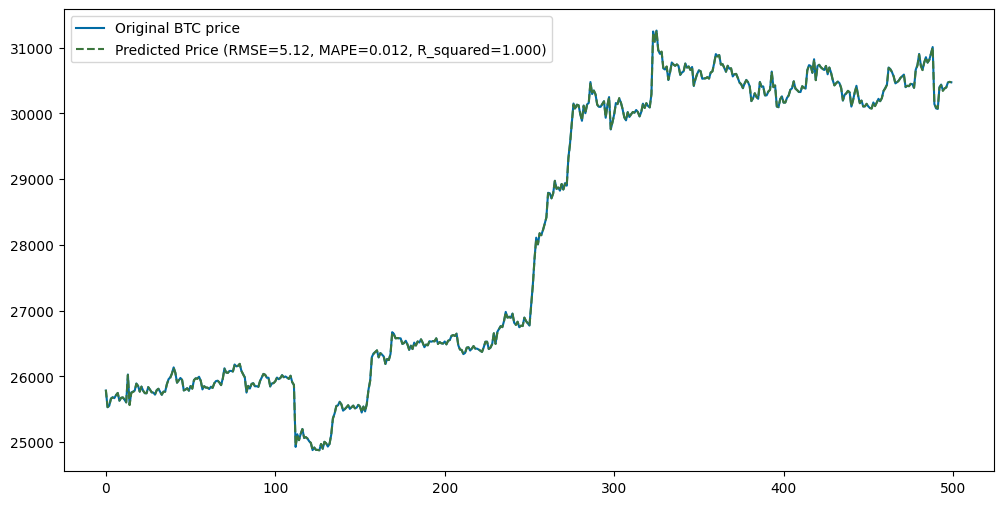

In [60]:
predicted_value, rmse_error, mdape_error, r2 = hybrid(LinearRegression(), LinearRegression())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values, label = 'Original BTC price');
ax.plot(predicted_value.values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

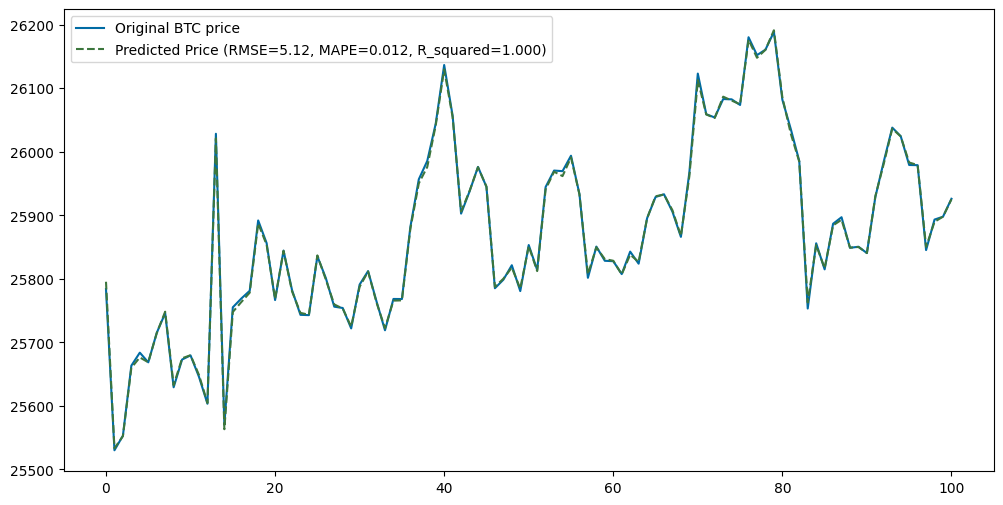

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101].values, label = 'Original BTC price');
ax.plot(predicted_value[0:101].values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

In [68]:
ress = y_test_original.values - predicted_value.values

ress_list = [float(x) for x in ress]

ress_mean = np.mean(ress_list)
ress_std = np.std(ress_list)

ress_standard = [(x - ress_mean)/ress_std for x in ress_list]

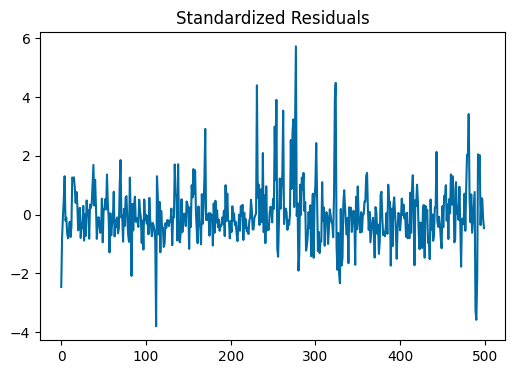

In [78]:
fig, ax = plt.subplots(figsize=(6, 4));
ax.plot(ress_standard);
ax.set_title('Standardized Residuals');

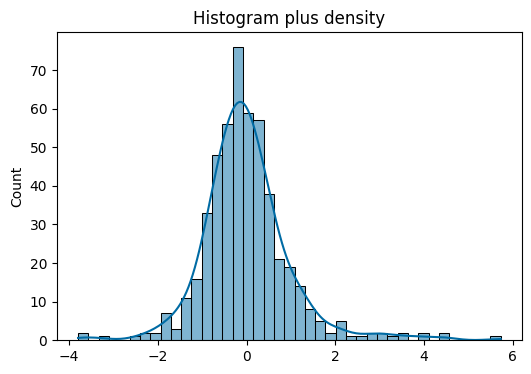

In [77]:
fig, ax = plt.subplots(figsize=(6, 4));
f = sns.histplot(data = ress_standard, kde=True)
ax.set_title("Histogram plus density");

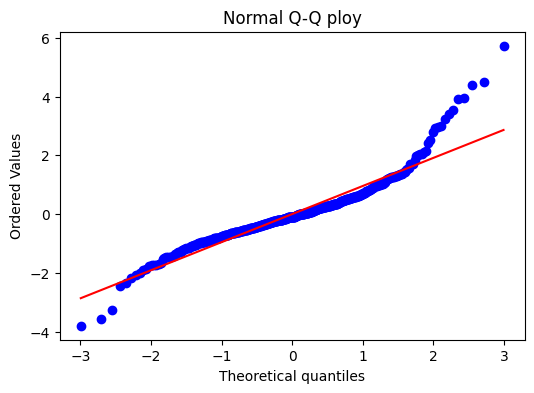

In [75]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(6, 4));
f = stats.probplot(ress_standard, dist="norm", plot=plt)
ax.set_title("Normal Q-Q ploy");

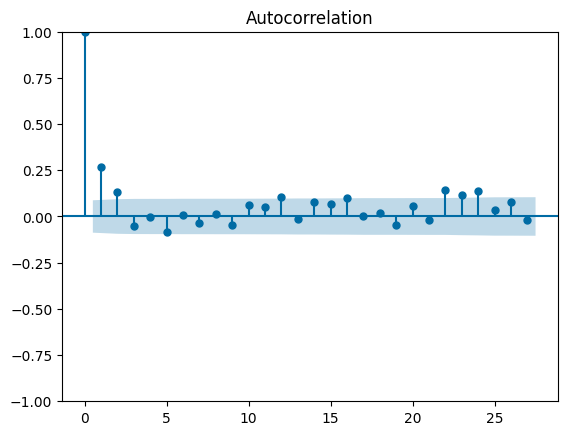

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(np.array(ress))
plt.show()

### Deep learning

##### ANN

In [169]:
def hybrid_dl(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred)
    y_fit = y_enc.inverse_transform(y_fit)

    y_resid = y_train_original - y_fit

    history = model2.fit(resid_X_train, y_resid, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), MAPE(y_test_original.values, y_pred_boosted.values), r2_score(y_test_original, y_pred_boosted)

In [170]:
def create_ann(units = 24, input_dim = 8, optimizer = RMSprop(learning_rate = 0.0001)):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        ANN_model = tf.keras.models.Sequential()
        # Add a hidden layer with input dimensions, neurons and activation function
        ANN_model.add(Dense(units = units, input_dim = input_dim, activation = 'relu',
                             activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))

        # Add output layer with one 1 ouput neuron as this is regression problem
        ANN_model.add(Dense(1, activation = 'linear'))

        # Compile the model with optimizer and loss function
        ANN_model.compile(optimizer = optimizer, loss = 'mse')
        
    return ANN_model

In [171]:
ANN_model1 = create_ann(units = 16, input_dim = 8, optimizer = Adam(learning_rate = 0.0001))
ANN_model2 = create_ann(units = 2, input_dim = 1, optimizer = Adam(learning_rate = 0.0001))

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [172]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32, callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 2s 5ms/step - loss: 0.7753 - val_loss: 1.0609 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 1s 5ms/step - loss: 0.5516 - val_loss: 0.8458 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 1s 4ms/step - loss: 0.4096 - val_loss: 0.6813 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 1s 4ms/step - loss: 0.3079 - val_loss: 0.5505 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 1s 4ms/step - loss: 0.2330 - val_loss: 0.4450 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 1s 4ms/step - loss: 0.1777 - val_loss: 0.3598 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 1s 4ms/step - loss: 0.1369 - val_loss: 0.2911 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 1s 4ms/step - loss: 0.1062 - val_loss: 0.2359 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 1

Epoch 70/500
207/207 [==============================] - 1s 4ms/step - loss: 8.5192e-04 - val_loss: 0.0012 - lr: 5.0000e-05
Epoch 71/500
207/207 [==============================] - 1s 4ms/step - loss: 8.3775e-04 - val_loss: 0.0012 - lr: 2.5000e-05
Epoch 72/500
207/207 [==============================] - 1s 4ms/step - loss: 8.3062e-04 - val_loss: 0.0012 - lr: 2.5000e-05
Epoch 73/500
207/207 [==============================] - 1s 4ms/step - loss: 8.2260e-04 - val_loss: 0.0012 - lr: 1.2500e-05
Epoch 74/500
207/207 [==============================] - 1s 4ms/step - loss: 8.1980e-04 - val_loss: 0.0012 - lr: 1.2500e-05
Epoch 75/500
207/207 [==============================] - 1s 5ms/step - loss: 8.1568e-04 - val_loss: 0.0012 - lr: 6.2500e-06
Epoch 76/500
207/207 [==============================] - 1s 4ms/step - loss: 8.1458e-04 - val_loss: 0.0012 - lr: 6.2500e-06
Epoch 77/500
207/207 [==============================] - 1s 4ms/step - loss: 8.1206e-04 - val_loss: 0.0012 - lr: 3.1250e-06
Epoch 78/500
207

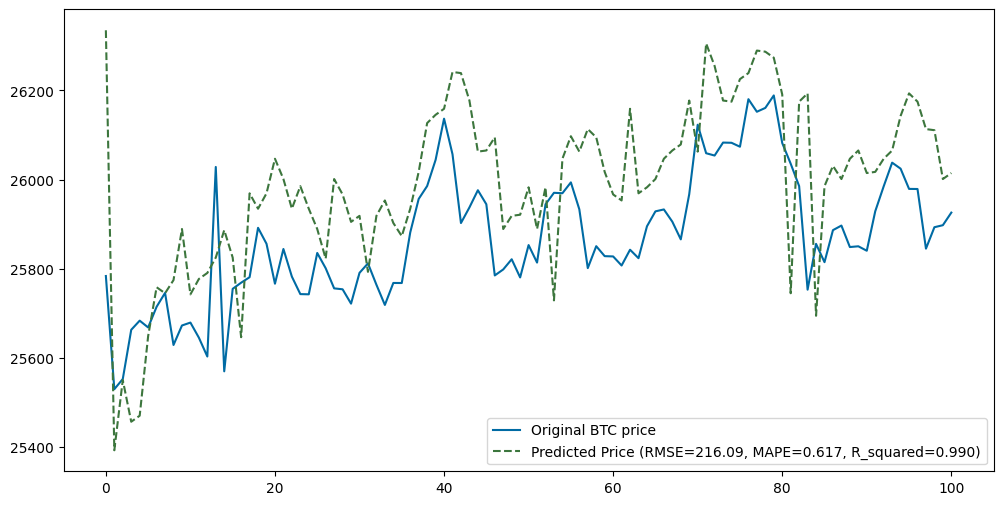

In [174]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101].values, label = 'Original BTC price');
ax.plot(predicted_value[0:101].values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mdape_error), r2)); 
ax.legend();
ax.set_title("");

##### LSTM

In [175]:
def create_lstm(units = 24, input_shape = (8, 1), optimizer = Adam()):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        LSTM_model = tf.keras.models.Sequential()
        # Add a hidden layer with input dimensions, neurons and activation function
        LSTM_model.add(LSTM(units = units, input_shape = input_shape, return_sequences = False, 
                            kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
        LSTM_model.add(Dense(1, activation = 'linear'))

        # Compile the model with optimizer and loss function
        LSTM_model.compile(optimizer = optimizer, loss = 'mse')
    return LSTM_model

In [114]:
LSTM_model1 = create_lstm(units = 16, input_shape = (8, 1), optimizer = Adam())
LSTM_model2 = create_lstm(units = 1, input_shape = (1, 1), optimizer = Adam())

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [115]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 7ms/step - loss: 0.0537 - val_loss: 0.2988 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0214 - val_loss: 0.1335 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 1s 5ms/step - loss: 0.0114 - val_loss: 0.0674 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 1s 5ms/step - loss: 0.0075 - val_loss: 0.0411 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0296 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0237 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0203 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0025 - val_loss: 0.0180 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 1s 5ms/step - loss: 0.0021 - val_

207/207 [==============================] - 1s 5ms/step - loss: 11875.9209 - val_loss: 72519.8672 - lr: 0.0010
Epoch 12/500
207/207 [==============================] - 1s 5ms/step - loss: 11875.6709 - val_loss: 72516.2734 - lr: 0.0010
Epoch 13/500
207/207 [==============================] - 1s 5ms/step - loss: 11852.7480 - val_loss: 72435.8516 - lr: 0.0010
Epoch 14/500
207/207 [==============================] - 1s 5ms/step - loss: 11832.8740 - val_loss: 72413.3672 - lr: 0.0010
Epoch 15/500
207/207 [==============================] - 1s 5ms/step - loss: 11824.5098 - val_loss: 72396.1953 - lr: 0.0010
Epoch 16/500
207/207 [==============================] - 1s 5ms/step - loss: 11817.6670 - val_loss: 72381.2422 - lr: 0.0010
Epoch 17/500
207/207 [==============================] - 1s 5ms/step - loss: 11811.5820 - val_loss: 72367.6094 - lr: 0.0010
Epoch 18/500
207/207 [==============================] - 1s 5ms/step - loss: 11805.9521 - val_loss: 72354.7734 - lr: 0.0010
Epoch 19/500
207/207 [=======

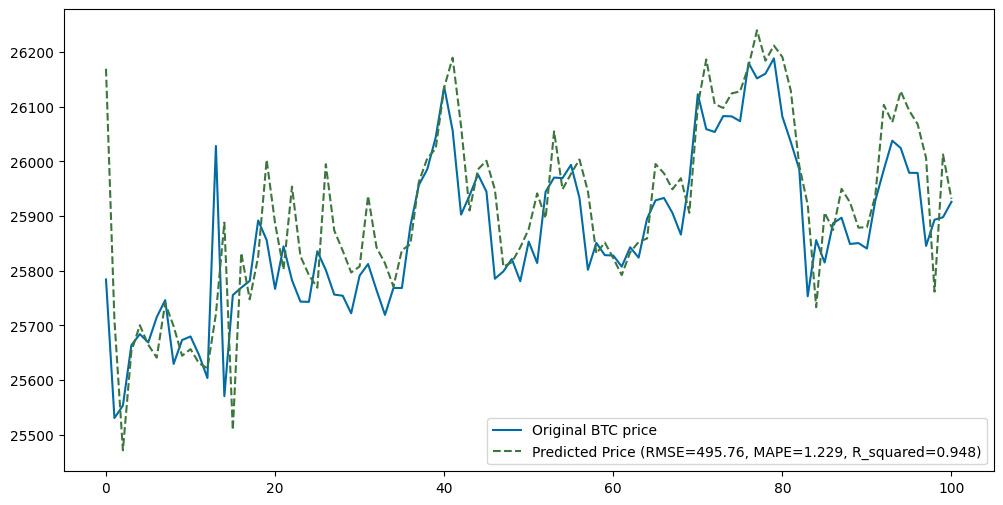

In [116]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101].values, label = 'Original BTC price');
ax.plot(predicted_value[0:101].values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

#### TKAN

In [176]:
def hybrid_dl_kan(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR], epochs = 500):
    
    history1 = model1.fit(trend_X_train, y_train, epochs = epochs, batch_size = batch_size, callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred)
    y_fit = y_enc.inverse_transform(y_fit)

    y_resid = y_train_original - y_fit

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted.values)), r2_score(y_test_original, y_pred_boosted)

In [732]:
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

TKAN = build_combined_model(input_shape = (trend_X_train.shape[1], 1), lstm_units = 8, hidden_units = 1, output_units = 1,
                             num_knots = 4, num_neurons = 1, optimizer = Adam())
mod2 = Ridge()

In [733]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl_kan(TKAN, mod2, batch_size = 32, callbacks = [callback, REDUCE_LR],
                                                           epochs = 150)

Epoch 1/150
259/259 [==============================] - 6s 9ms/step - loss: 0.5096 - lr: 0.0010
Epoch 2/150
259/259 [==============================] - 3s 10ms/step - loss: 0.2478 - lr: 0.0010
Epoch 3/150
259/259 [==============================] - 2s 8ms/step - loss: 0.1618 - lr: 0.0010
Epoch 4/150
259/259 [==============================] - 2s 8ms/step - loss: 0.1087 - lr: 0.0010
Epoch 5/150
259/259 [==============================] - 2s 8ms/step - loss: 0.0729 - lr: 0.0010
Epoch 6/150
259/259 [==============================] - 2s 8ms/step - loss: 0.0530 - lr: 0.0010
Epoch 7/150
259/259 [==============================] - 2s 8ms/step - loss: 0.0421 - lr: 0.0010
Epoch 8/150
259/259 [==============================] - 2s 8ms/step - loss: 0.0328 - lr: 0.0010
Epoch 9/150
259/259 [==============================] - 2s 8ms/step - loss: 0.0287 - lr: 0.0010
Epoch 10/150
259/259 [==============================] - 2s 8ms/step - loss: 0.0251 - lr: 0.0010
Epoch 11/150
259/259 [==========================

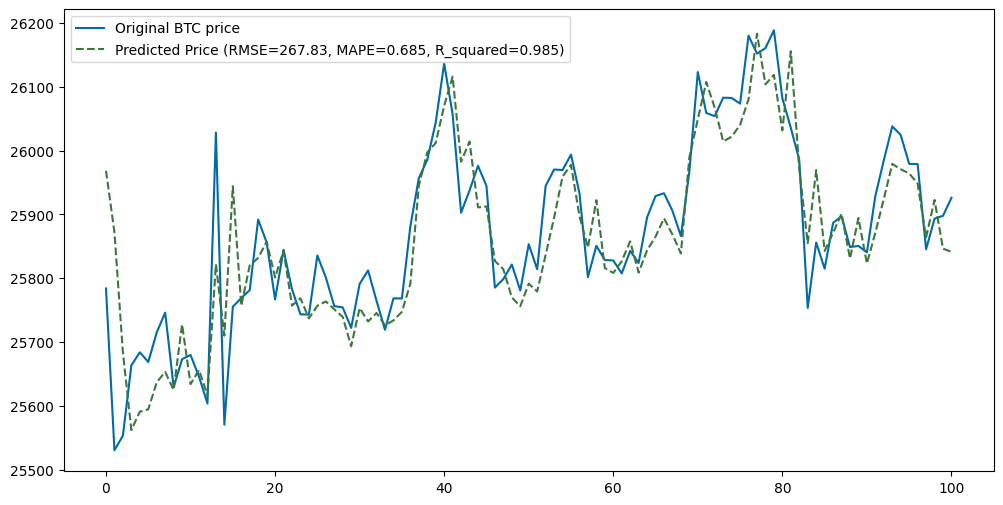

In [731]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101].values, label = 'Original BTC price');
ax.plot(predicted_value[0:101].values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

##### CNN-LSTM

In [571]:
trend_X_train.shape

(8259, 8)

In [572]:
trend_X_train = trend_X_train.values.reshape(trend_X_train.shape[0], 1, trend_X_train.shape[1], 1)
trend_X_test = trend_X_test.values.reshape(trend_X_test.shape[0], 1, trend_X_test.shape[1],  1)

In [573]:
# resid_X_train = resid_X_train.values.reshape(resid_X_train.shape[0], 1, resid_X_train.shape[1], 1)
# resid_X_test = resid_X_test.values.reshape(resid_X_test.shape[0], 1, resid_X_test.shape[1], 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [120]:
def create_cnn_lstm(filters = 32, kernel_size = 1, input_shape=(None, 19, 1), lstm_units = 19,
                    optimizer = SGD(learning_rate = 0.1), pooling = True):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        CNN_LSTM_model = tf.keras.models.Sequential()

        CNN_LSTM_model.add(TimeDistributed(Conv1D(filters = filters, kernel_size = kernel_size, activation='relu'),
                                           input_shape = input_shape))
        if pooling == True:
            CNN_LSTM_model.add(TimeDistributed(MaxPooling1D(pool_size = 2)))
        CNN_LSTM_model.add(TimeDistributed(Flatten()))
        # Add a hidden layer with input dimensions, neurons and activation function

        CNN_LSTM_model.add(LSTM(units = lstm_units, kernel_initializer = 'he_uniform', bias_initializer = 'zeros',
                            activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))
        CNN_LSTM_model.add(Dropout(rate = 0))
        # Add output layer with one 1 ouput neuron as this is regression problem
        CNN_LSTM_model.add(Dense(1, activation = 'linear'))
        CNN_LSTM_model.summary()

        # Compile the model with optimizer and loss function
        CNN_LSTM_model.compile(optimizer = optimizer, loss = 'mse')
    return CNN_LSTM_model

In [121]:
cnn_lstm1 = create_cnn_lstm(filters = 64, kernel_size = 3, input_shape = (None, 8, 1), lstm_units = 8,
                            optimizer = Adam(), pooling = True)

ANN_model = create_ann(units = 4, input_dim = 1, optimizer = Adam(learning_rate = 0.0001))
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 6, 64)      256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 3, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 192)        0         
 tributed)                                                       
                                                                 
 lstm_12 (LSTM)              (None, 8)                 6432      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                     

In [122]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(cnn_lstm1, ANN_model, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 10s 10ms/step - loss: 0.0727 - val_loss: 0.0678 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0221 - val_loss: 0.0297 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0081 - val_loss: 0.0204 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0166 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0040 - val_loss: 0.0135 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0114 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0033 - val_loss: 0.0100 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0088 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0032 - va

16/16 [==============================] - 0s 2ms/step


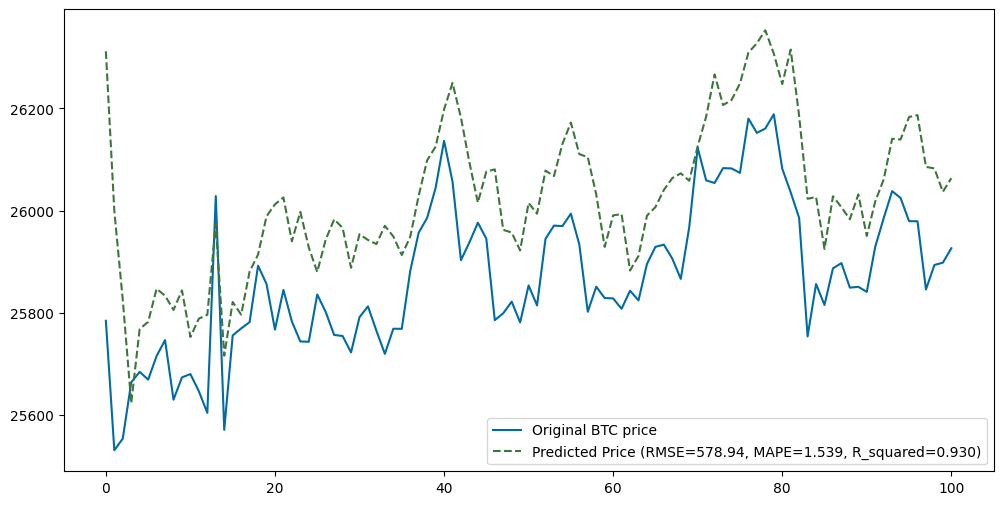

In [124]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101].values, label = 'Original BTC price');
ax.plot(predicted_value[0:101].values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

##### ML-DL hybrid

In [177]:
def hybrid_dl_ml(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred)
    y_fit = y_enc.inverse_transform(y_fit)

    y_resid = y_train_original - y_fit

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted.values)), r2_score(y_test_original, y_pred_boosted)

In [178]:
regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [180]:
LSTM_model1 = create_lstm(units = 8, input_shape = (8, 1), optimizer = Adam())

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [181]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl_ml(LSTM_model1, regressor2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 6s 10ms/step - loss: 0.2019 - val_loss: 0.8669 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 2s 10ms/step - loss: 0.1270 - val_loss: 0.5521 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0827 - val_loss: 0.3548 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 2s 7ms/step - loss: 0.0547 - val_loss: 0.2300 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 1s 7ms/step - loss: 0.0365 - val_loss: 0.1500 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 1s 7ms/step - loss: 0.0242 - val_loss: 0.1011 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0154 - val_loss: 0.0721 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 2s 7ms/step - loss: 0.0101 - val_loss: 0.0543 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 1s 7ms/step - loss: 0.0077 - va

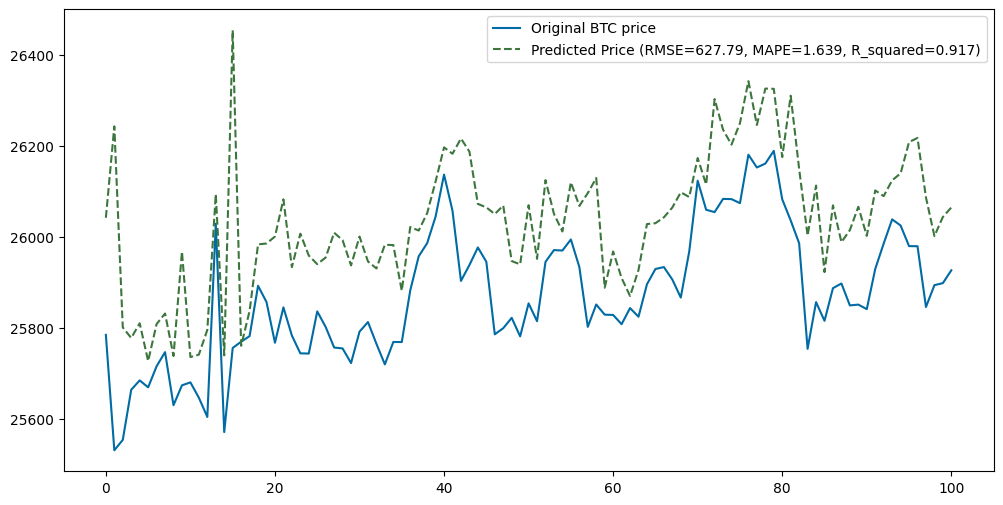

In [182]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101].values, label = 'Original BTC price');
ax.plot(predicted_value[0:101].values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

In [178]:
cnn_lstm = create_cnn_lstm(filters = 256, kernel_size = 2, input_shape = (None, 8, 1), lstm_units = 256,
                            optimizer = Adam(learning_rate = 0.0001), pooling = True)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_52 (TimeDi  (None, None, 7, 256)     768       
 stributed)                                                      
                                                                 
 time_distributed_53 (TimeDi  (None, None, 3, 256)     0         
 stributed)                                                      
                                                                 
 time_distributed_54 (TimeDi  (None, None, 768)        0         
 stributed)                                                      
                                                                 
 lstm_29 (LSTM)              (None, 256)               1049600   
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                     

In [179]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl_ml(cnn_lstm, regressor2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 11ms/step - loss: 0.0644 - val_loss: 0.0156 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0082 - val_loss: 0.0026 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0023 - val_loss: 0.0021 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0018 - val_loss: 0.0021 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 0.0019 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0014 - val_loss: 0.0016 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0011 - val_loss: 0.0012 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 

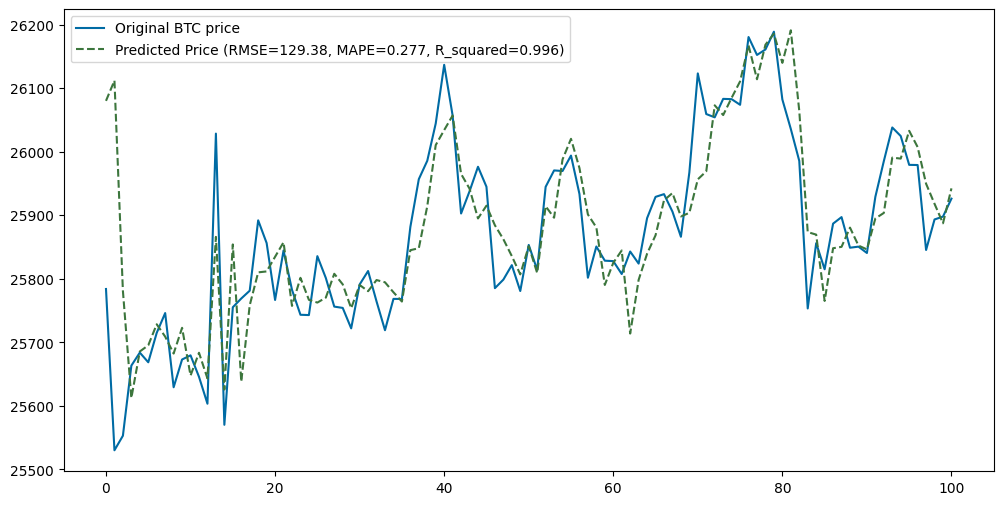

In [180]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101].values, label = 'Original BTC price');
ax.plot(predicted_value[0:101].values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

##### With base features and sentiments

In [181]:
#trend = new_df.drop(['seasonal', 'resid', 'close'], axis = 1)
trend = new_df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'hourly_volume', 'hourly_return', 'trend_score',
                'Compound_score', 'Polarity', 'trend']]
seasonal = new_df[['seasonal']]
resid = new_df[['resid']]
y = new_df[['close']]

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)
seasonal_X_train, seasonal_X_test = train_test_split(seasonal, test_size = 500, shuffle = False)

In [182]:
trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

((8259, 11),
 (500, 11),
 (8259, 1),
 (500, 1),
 (8259, 1),
 (500, 1),
 (8259, 1),
 (500, 1))

In [183]:
# trend_X_train = trend_X_train.reshape(-1, 1)
# trend_X_test = trend_X_test.reshape(-1, 1)
# resid_X_train = resid_X_train.reshape(-1, 1)
# resid_X_test = resid_X_test.reshape(-1, 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [184]:
# trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

In [185]:
# Functions for transformation
y_train_original = y_train.copy()
y_test_original = y_test.copy()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

cols1 = trend_X_train.columns
trend_enc = RobustScaler()
trend_X_train[cols1] = trend_enc.fit_transform(trend_X_train[cols1])
trend_X_test[cols1] = trend_enc.transform(trend_X_test[cols1])

cols2 = y_train.columns
y_enc = RobustScaler()
y_train[cols2] = y_enc.fit_transform(y_train[cols2])
y_test[cols2] = y_enc.transform(y_test[cols2])

##### Search for model combination

In [186]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error, r2 = hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

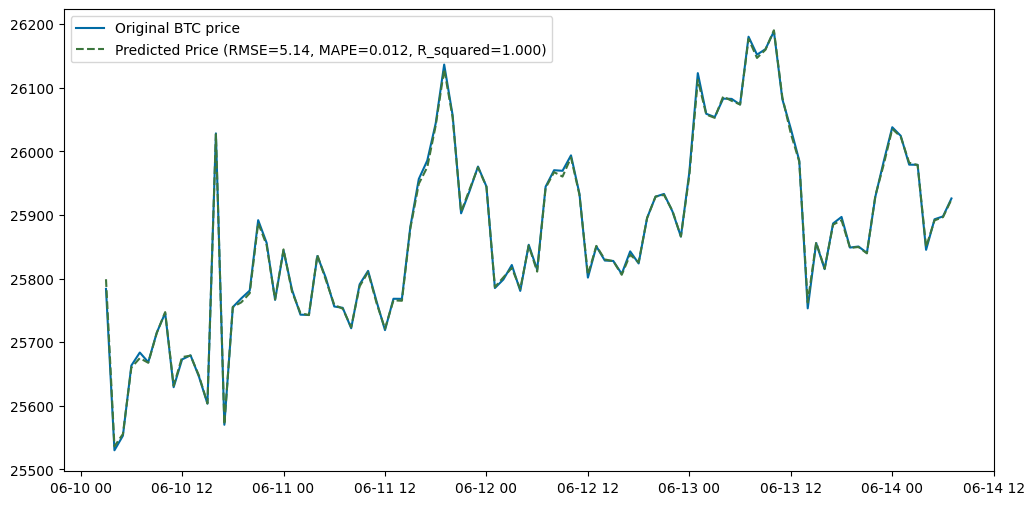

In [188]:
predicted_value, rmse_error, mdape_error, r2 = hybrid(LinearRegression(), SVR())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

### Deep learning

##### ANN

In [194]:
ANN_model1 = create_ann(units = 22, input_dim = 11, optimizer = Adam(learning_rate = 0.0001))
ANN_model2 = create_ann(units = 1, input_dim = 1, optimizer = Adam(learning_rate = 0.001))

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [195]:
predicted_value, rmse_error, mdape_error, r2 = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32, callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 1s 4ms/step - loss: 0.1447 - val_loss: 0.3329 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0718 - val_loss: 0.2477 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0472 - val_loss: 0.1804 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0361 - val_loss: 0.1319 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0291 - val_loss: 0.0985 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0239 - val_loss: 0.0755 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0198 - val_loss: 0.0591 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0165 - val_loss: 0.0470 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 1

Epoch 70/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-06
Epoch 71/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-06
Epoch 72/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-06
Epoch 73/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-06
Epoch 74/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-06
Epoch 75/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-06
Epoch 76/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-06
Epoch 77/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-06
Epoch 78/500
207/207 [==========================

207/207 [==============================] - 1s 4ms/step - loss: 36411.7266 - val_loss: 39071.8047 - lr: 0.0010
Epoch 54/500
207/207 [==============================] - 1s 4ms/step - loss: 36407.5117 - val_loss: 39058.5117 - lr: 0.0010
Epoch 55/500
207/207 [==============================] - 1s 4ms/step - loss: 36403.3203 - val_loss: 39045.2031 - lr: 0.0010
Epoch 56/500
207/207 [==============================] - 1s 4ms/step - loss: 36399.1523 - val_loss: 39031.9648 - lr: 0.0010
Epoch 57/500
207/207 [==============================] - 1s 4ms/step - loss: 36394.9922 - val_loss: 39018.8125 - lr: 0.0010
Epoch 58/500
207/207 [==============================] - 1s 4ms/step - loss: 36390.8555 - val_loss: 39005.7109 - lr: 0.0010
Epoch 59/500
207/207 [==============================] - 1s 4ms/step - loss: 36386.7148 - val_loss: 38992.6836 - lr: 0.0010
Epoch 60/500
207/207 [==============================] - 1s 4ms/step - loss: 36382.6016 - val_loss: 38979.6992 - lr: 0.0010
Epoch 61/500
207/207 [=======

207/207 [==============================] - 1s 4ms/step - loss: 35948.7930 - val_loss: 37745.0352 - lr: 0.0010
Epoch 186/500
207/207 [==============================] - 1s 4ms/step - loss: 35945.8086 - val_loss: 37737.7930 - lr: 0.0010
Epoch 187/500
207/207 [==============================] - 1s 4ms/step - loss: 35942.8555 - val_loss: 37730.6328 - lr: 0.0010
Epoch 188/500
207/207 [==============================] - 1s 4ms/step - loss: 35939.8789 - val_loss: 37723.4766 - lr: 0.0010
Epoch 189/500
207/207 [==============================] - 1s 4ms/step - loss: 35936.9453 - val_loss: 37716.2812 - lr: 0.0010
Epoch 190/500
207/207 [==============================] - 1s 4ms/step - loss: 35934.0195 - val_loss: 37709.1445 - lr: 0.0010
Epoch 191/500
207/207 [==============================] - 1s 4ms/step - loss: 35931.0938 - val_loss: 37702.0859 - lr: 0.0010
Epoch 192/500
207/207 [==============================] - 1s 4ms/step - loss: 35928.1484 - val_loss: 37695.0430 - lr: 0.0010
Epoch 193/500
207/207 

207/207 [==============================] - 1s 4ms/step - loss: 35594.7656 - val_loss: 37092.9453 - lr: 0.0010
Epoch 318/500
207/207 [==============================] - 1s 4ms/step - loss: 35592.4023 - val_loss: 37089.3906 - lr: 0.0010
Epoch 319/500
207/207 [==============================] - 1s 4ms/step - loss: 35590.0625 - val_loss: 37085.9336 - lr: 0.0010
Epoch 320/500
207/207 [==============================] - 1s 4ms/step - loss: 35587.6719 - val_loss: 37082.3164 - lr: 0.0010
Epoch 321/500
207/207 [==============================] - 1s 4ms/step - loss: 35585.3398 - val_loss: 37078.7539 - lr: 0.0010
Epoch 322/500
207/207 [==============================] - 1s 4ms/step - loss: 35583.0195 - val_loss: 37075.2070 - lr: 0.0010
Epoch 323/500
207/207 [==============================] - 1s 4ms/step - loss: 35580.6758 - val_loss: 37071.9023 - lr: 0.0010
Epoch 324/500
207/207 [==============================] - 1s 4ms/step - loss: 35578.3594 - val_loss: 37068.6875 - lr: 0.0010
Epoch 325/500
207/207 

207/207 [==============================] - 1s 4ms/step - loss: 35314.8945 - val_loss: 36745.2891 - lr: 0.0010
Epoch 450/500
207/207 [==============================] - 1s 4ms/step - loss: 35313.1055 - val_loss: 36742.4219 - lr: 0.0010
Epoch 451/500
207/207 [==============================] - 1s 4ms/step - loss: 35311.2930 - val_loss: 36739.7656 - lr: 0.0010
Epoch 452/500
207/207 [==============================] - 1s 4ms/step - loss: 35309.5117 - val_loss: 36737.1836 - lr: 0.0010
Epoch 453/500
207/207 [==============================] - 1s 4ms/step - loss: 35307.7266 - val_loss: 36734.7930 - lr: 0.0010
Epoch 454/500
207/207 [==============================] - 1s 4ms/step - loss: 35305.9258 - val_loss: 36732.3633 - lr: 0.0010
Epoch 455/500
207/207 [==============================] - 1s 4ms/step - loss: 35304.1641 - val_loss: 36729.6992 - lr: 0.0010
Epoch 456/500
207/207 [==============================] - 1s 4ms/step - loss: 35302.3555 - val_loss: 36726.9141 - lr: 0.0010
Epoch 457/500
207/207 

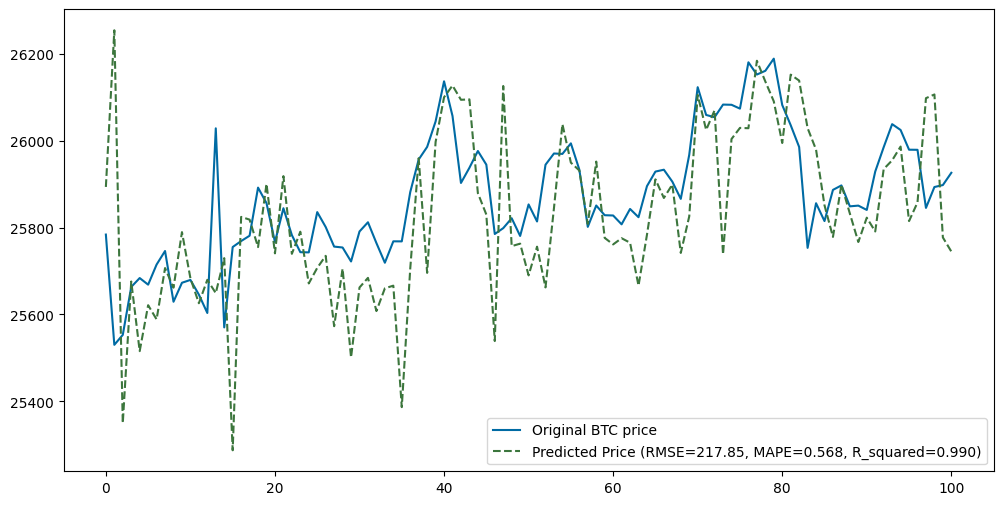

In [197]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101].values, label = 'Original BTC price');
ax.plot(predicted_value[0:101].values, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, mdape_error, r2)); 
ax.legend();
ax.set_title("");

##### LSTM

In [369]:
LSTM_model1 = create_lstm(units = 33, input_shape = (11, 1), optimizer = Adam())
LSTM_model2 = create_lstm(units = 10, input_shape = (1, 1), optimizer = Adam())

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [370]:
predicted_value, rmse_error, mdape_error = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 10ms/step - loss: 0.0266 - val_loss: 0.0317 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0103 - val_loss: 0.0181 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0061 - val_loss: 0.0154 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0046 - val_loss: 0.0133 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0035 - val_loss: 0.0117 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0027 - val_loss: 0.0104 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0022 - val_loss: 0.0093 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0018 - val_loss: 0.0083 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0015 - val

Epoch 89/500
207/207 [==============================] - 1s 6ms/step - loss: 10598.7236 - val_loss: 57331.7734 - lr: 0.0010
Epoch 90/500
207/207 [==============================] - 1s 6ms/step - loss: 10588.3320 - val_loss: 57315.1133 - lr: 0.0010
Epoch 91/500
207/207 [==============================] - 1s 6ms/step - loss: 10578.0244 - val_loss: 57298.5703 - lr: 0.0010
Epoch 92/500
207/207 [==============================] - 1s 7ms/step - loss: 10567.7891 - val_loss: 57282.1836 - lr: 0.0010
Epoch 93/500
207/207 [==============================] - 1s 6ms/step - loss: 10557.6240 - val_loss: 57265.9062 - lr: 0.0010
Epoch 94/500
207/207 [==============================] - 1s 6ms/step - loss: 10547.5352 - val_loss: 57249.8008 - lr: 0.0010
Epoch 95/500
207/207 [==============================] - 1s 6ms/step - loss: 10537.5156 - val_loss: 57233.8242 - lr: 0.0010
Epoch 96/500
207/207 [==============================] - 1s 6ms/step - loss: 10527.5703 - val_loss: 57217.9648 - lr: 0.0010
Epoch 97/500
207

207/207 [==============================] - 1s 6ms/step - loss: 9663.5947 - val_loss: 56028.8555 - lr: 0.0010
Epoch 222/500
207/207 [==============================] - 1s 6ms/step - loss: 9658.8477 - val_loss: 56023.0352 - lr: 0.0010
Epoch 223/500
207/207 [==============================] - 1s 6ms/step - loss: 9654.1299 - val_loss: 56017.2656 - lr: 0.0010
Epoch 224/500
207/207 [==============================] - 1s 6ms/step - loss: 9649.4385 - val_loss: 56011.5312 - lr: 0.0010
Epoch 225/500
207/207 [==============================] - 1s 6ms/step - loss: 9644.7666 - val_loss: 56005.8320 - lr: 0.0010
Epoch 226/500
207/207 [==============================] - 1s 6ms/step - loss: 9640.1172 - val_loss: 56000.1406 - lr: 0.0010
Epoch 227/500
207/207 [==============================] - 1s 7ms/step - loss: 9635.4932 - val_loss: 55994.5117 - lr: 0.0010
Epoch 228/500
207/207 [==============================] - 1s 6ms/step - loss: 9630.8955 - val_loss: 55988.9141 - lr: 0.0010
Epoch 229/500
207/207 [=======

Epoch 288/500
207/207 [==============================] - 1s 6ms/step - loss: 9393.3975 - val_loss: 55705.7617 - lr: 0.0010
Epoch 289/500
207/207 [==============================] - 1s 6ms/step - loss: 9389.9932 - val_loss: 55701.7578 - lr: 0.0010
Epoch 290/500
207/207 [==============================] - 1s 7ms/step - loss: 9386.6162 - val_loss: 55697.7812 - lr: 0.0010
Epoch 291/500
207/207 [==============================] - 1s 6ms/step - loss: 9383.2471 - val_loss: 55693.8125 - lr: 0.0010
Epoch 292/500
207/207 [==============================] - 1s 6ms/step - loss: 9379.8955 - val_loss: 55689.8867 - lr: 0.0010
Epoch 293/500
207/207 [==============================] - 1s 6ms/step - loss: 9376.5605 - val_loss: 55685.9453 - lr: 0.0010
Epoch 294/500
207/207 [==============================] - 1s 6ms/step - loss: 9373.2412 - val_loss: 55682.0469 - lr: 0.0010
Epoch 295/500
207/207 [==============================] - 1s 6ms/step - loss: 9369.9365 - val_loss: 55678.1562 - lr: 0.0010
Epoch 296/500
20

Epoch 421/500
207/207 [==============================] - 1s 6ms/step - loss: 9051.7227 - val_loss: 55293.5273 - lr: 0.0010
Epoch 422/500
207/207 [==============================] - 1s 6ms/step - loss: 9049.8115 - val_loss: 55291.2266 - lr: 0.0010
Epoch 423/500
207/207 [==============================] - 1s 6ms/step - loss: 9047.9072 - val_loss: 55288.9219 - lr: 0.0010
Epoch 424/500
207/207 [==============================] - 1s 6ms/step - loss: 9046.0156 - val_loss: 55286.6523 - lr: 0.0010
Epoch 425/500
207/207 [==============================] - 1s 6ms/step - loss: 9044.1221 - val_loss: 55284.3828 - lr: 0.0010
Epoch 426/500
207/207 [==============================] - 1s 6ms/step - loss: 9042.2383 - val_loss: 55282.1250 - lr: 0.0010
Epoch 427/500
207/207 [==============================] - 1s 6ms/step - loss: 9040.3691 - val_loss: 55279.8633 - lr: 0.0010
Epoch 428/500
207/207 [==============================] - 1s 6ms/step - loss: 9038.5088 - val_loss: 55277.6211 - lr: 0.0010
Epoch 429/500
20

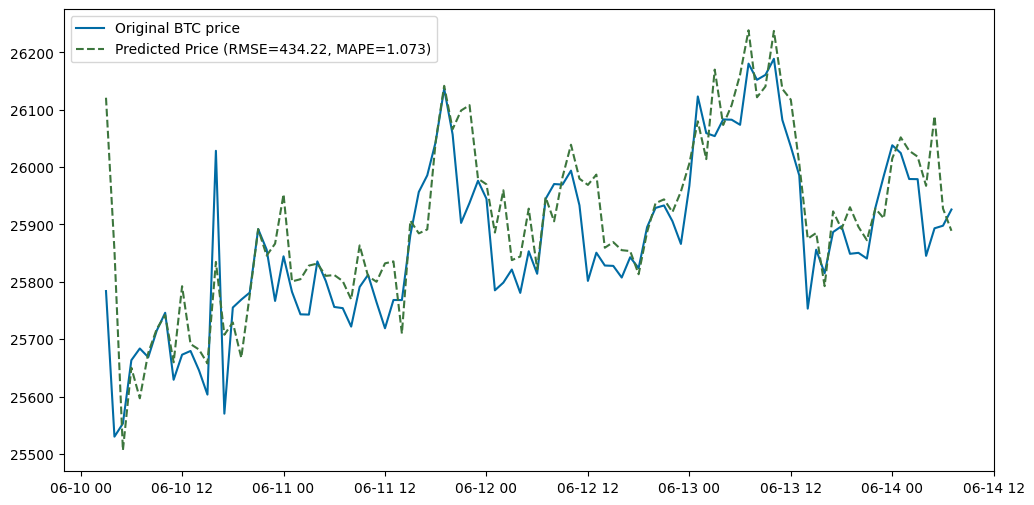

In [372]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### CNN-LSTM

In [376]:
trend_X_train.shape

(8259, 1, 11, 1)

In [374]:
trend_X_train = trend_X_train.values.reshape(trend_X_train.shape[0], 1, trend_X_train.shape[1], 1)
trend_X_test = trend_X_test.values.reshape(trend_X_test.shape[0], 1, trend_X_test.shape[1],  1)

In [375]:
# resid_X_train = resid_X_train.values.reshape(resid_X_train.shape[0], 1, resid_X_train.shape[1], 1)
# resid_X_test = resid_X_test.values.reshape(resid_X_test.shape[0], 1, resid_X_test.shape[1], 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [378]:
cnn_lstm1 = create_cnn_lstm(filters = 64, kernel_size = 3, input_shape = (None, 11, 1), lstm_units = 11,
                            optimizer = Adam(), pooling = True)

ANN_model = create_ann(units = 4, input_dim = 1, optimizer = Adam(learning_rate = 0.0001))
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_120 (TimeD  (None, None, 9, 64)      256       
 istributed)                                                     
                                                                 
 time_distributed_121 (TimeD  (None, None, 4, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_122 (TimeD  (None, None, 256)        0         
 istributed)                                                     
                                                                 
 lstm_55 (LSTM)              (None, 8)                 8480      
                                                                 
 dropout_41 (Dropout)        (None, 8)                 0         
                                                    

In [379]:
predicted_value, rmse_error, mdape_error = hybrid_dl(cnn_lstm1, ANN_model, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 5s 8ms/step - loss: 0.0964 - val_loss: 0.1921 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0316 - val_loss: 0.0265 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0095 - val_loss: 0.0199 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0055 - val_loss: 0.0165 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0042 - val_loss: 0.0131 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0034 - val_loss: 0.0105 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0030 - val_loss: 0.0087 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0028 - val_loss: 0.0075 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0028 - val_

207/207 [==============================] - 2s 8ms/step - loss: 5.6943e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 136/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6931e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 137/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6920e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 138/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6909e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 139/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6897e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 140/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6886e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 141/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6875e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 142/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6863e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 143/500
207/207 

207/207 [==============================] - 2s 8ms/step - loss: 5.5620e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 268/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5611e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 269/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5602e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 270/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5593e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 271/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5585e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 272/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5576e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 273/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5567e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 274/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5558e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 275/500
207/207 

207/207 [==============================] - 2s 8ms/step - loss: 5.4561e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 400/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4554e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 401/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4547e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 402/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4539e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 403/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4532e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 404/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4525e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 405/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4518e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 406/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4510e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 407/500
207/207 

Epoch 30/500
207/207 [==============================] - 1s 4ms/step - loss: 12620.6074 - val_loss: 73594.4844 - lr: 1.0000e-04
Epoch 31/500
207/207 [==============================] - 1s 4ms/step - loss: 12537.2422 - val_loss: 73541.2969 - lr: 1.0000e-04
Epoch 32/500
207/207 [==============================] - 1s 4ms/step - loss: 12456.6777 - val_loss: 73491.9141 - lr: 1.0000e-04
Epoch 33/500
207/207 [==============================] - 1s 4ms/step - loss: 12379.0430 - val_loss: 73446.3281 - lr: 1.0000e-04
Epoch 34/500
207/207 [==============================] - 1s 4ms/step - loss: 12304.4287 - val_loss: 73404.5000 - lr: 1.0000e-04
Epoch 35/500
207/207 [==============================] - 1s 5ms/step - loss: 12232.9082 - val_loss: 73366.3984 - lr: 1.0000e-04
Epoch 36/500
207/207 [==============================] - 1s 4ms/step - loss: 12164.5137 - val_loss: 73331.8984 - lr: 1.0000e-04
Epoch 37/500
207/207 [==============================] - 1s 4ms/step - loss: 12099.2725 - val_loss: 73300.9297 -

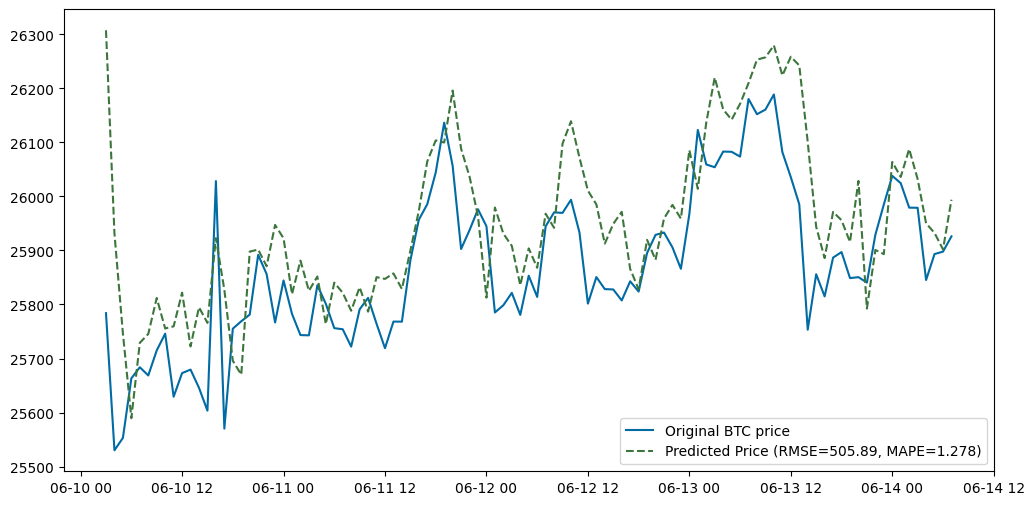

In [380]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### ML-DL hybrid

In [382]:
cnn_lstm = create_cnn_lstm(filters = 64, kernel_size = 4, input_shape = (None, 11, 1), lstm_units = 11,
                            optimizer = Adam(learning_rate = 0.0001), pooling = True)

Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_126 (TimeD  (None, None, 8, 64)      320       
 istributed)                                                     
                                                                 
 time_distributed_127 (TimeD  (None, None, 4, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_128 (TimeD  (None, None, 256)        0         
 istributed)                                                     
                                                                 
 lstm_57 (LSTM)              (None, 11)                11792     
                                                                 
 dropout_43 (Dropout)        (None, 11)                0         
                                                    

In [383]:
predicted_value, rmse_error, mdape_error = hybrid_dl_ml(cnn_lstm, regressor2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 8ms/step - loss: 0.2542 - val_loss: 1.2392 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 1s 6ms/step - loss: 0.1912 - val_loss: 1.0107 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.1241 - val_loss: 0.6981 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0632 - val_loss: 0.3812 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0292 - val_loss: 0.1778 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0149 - val_loss: 0.0810 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0094 - val_loss: 0.0414 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0070 - val_loss: 0.0255 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 2

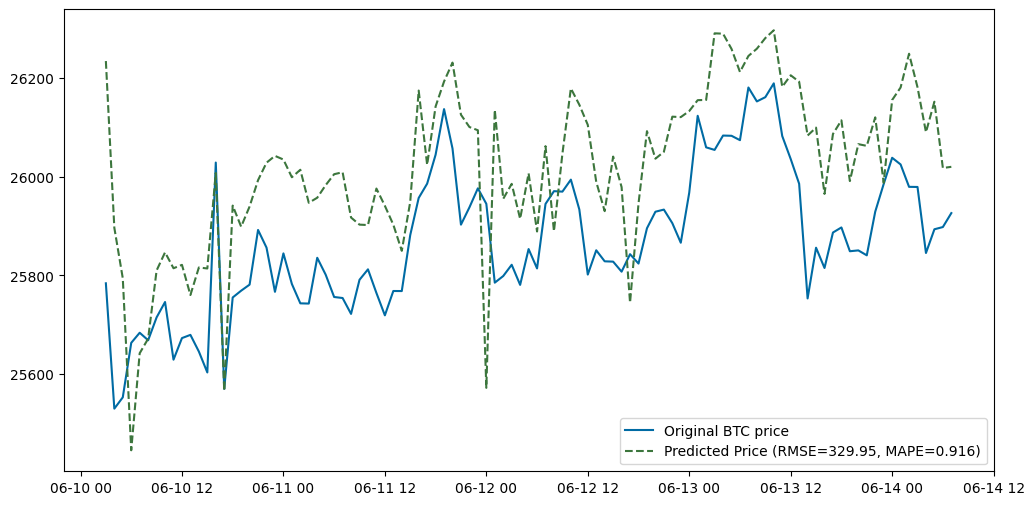

In [384]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");